In [299]:
T_icp = np.array([[ 0.99942048, -0.00596383,  0.03351335, -0.09469776,],
 [ 0.00661921,  0.99978836, -0.01947894,  0.00123022,],
 [-0.03339009,  0.01968948,  0.99924843, -0.00793561,],
 [ 0.,          0.,          0.,          1.,        ]])

T_icp_1 = np.array(
    [[ 9.99996998e-01,  2.12574358e-03,  1.21863586e-03, -1.95633868e-03,],
 [-2.12226993e-03,  9.99993702e-01, -2.84468224e-03, -2.39758590e-04,],
 [-1.22467525e-03,  2.84208743e-03,  9.99995211e-01, -5.76601073e-04,],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,]]
)

rvec2 = np.array([[-0.18295185],
        [ 0.51716346],
        [ 0.07610693]])
R_org, _ = cv2.Rodrigues(rvec2)
tvec2 = np.array([[ 0.10873711],
        [-0.03153327],
        [ 1.05058628]])
t_org = tvec2.reshape(3)

In [285]:
pts1 = np.array([[ 0.20495756, -0.29003009, -0.01683022,],
 [ 0.20877554, -0.29270434, -0.01039939,],
 [ 0.21329176, -0.29385933, -0.00680158,]])


pts2 = np.array([[ 0.10869434, -0.28742204, -0.03883585,],
                [ 0.11274327, -0.29022206, -0.03260285,],
                [ 0.11738596, -0.29143657, -0.02919038,]])
pts3 = np.array(
    [[ 0.11130668, -0.287054,   -0.03730728,],
 [ 0.11535391, -0.28982768, -0.03106141,],
 [ 0.11999498, -0.29102261, -0.02763985,]]
)

In [274]:
# org transform
# [[ 9.98040659e-01 -2.36202852e-03 -1.80127632e-03]
#  [ 1.69404900e-04  9.99753943e-01  2.26548635e-03]
#  [-7.37702822e-04 -3.08444083e-03  9.99418610e-01]]
(np.eye(3)@((T_icp[:3,:3]).T)+T_icp[:3,3])

array([[ 9.98040659e-01, -2.36202852e-03, -1.80127632e-03],
       [ 1.69404900e-04,  9.99753943e-01,  2.26548636e-03],
       [-7.37702820e-04, -3.08444083e-03,  9.99418610e-01]])

In [264]:
(pts2-T_icp[:3,3])@np.linalg.inv((T_icp[:3,:3]).T)

array([[ 0.11130668, -0.28705399, -0.03730728],
       [ 0.11535391, -0.28982767, -0.03106141],
       [ 0.11999498, -0.29102261, -0.02763984]])

In [297]:
pts_temp = pts1@(((T_icp)[:3,:3]).T)+(T_icp)[:3,3]
pts_temp = pts_temp@((T_icp_1[:3,:3]).T)+T_icp_1[:3,3]
pts_temp2 = pts1@(((T_icp_1@T_icp)[:3,:3]).T)+(T_icp_1@T_icp)[:3,3]
pts_temp, pts_temp2

(array([[ 0.10869434, -0.28742204, -0.03883584],
        [ 0.11274327, -0.29022206, -0.03260285],
        [ 0.11738596, -0.29143657, -0.02919038]]),
 array([[ 0.10869434, -0.28742204, -0.03883584],
        [ 0.11274327, -0.29022206, -0.03260285],
        [ 0.11738596, -0.29143657, -0.02919038]]))

In [ ]:
T_new = T_icp_1@T_icp
pts1@(((T_new)[:3,:3]).T)+(T_new)[:3,3]

array([[ 0.10869434, -0.28742204, -0.03883584],
       [ 0.11274327, -0.29022206, -0.03260285],
       [ 0.11738596, -0.29143657, -0.02919038]])

In [ ]:
T_new = T_icp_1@T_icp
pts1@(((T_new)[:3,:3]).T)+(T_new)[:3,3]
print("hello gina~? What are you doing~~")
print("Oh!  I'm just looking for my new keyboard~~")
print("Ah jin jja?? I'll buy new one for you -sungbeen-")
print("oh.. I'll no sayang.. thank you...")

array([[ 0.11477446, -0.29771674, -0.02540895],
       [ 0.10822538, -0.28616576, -0.01871437],
       [ 0.1140639 , -0.28895814, -0.01484062]])

In [308]:
T_new

array([[ 0.99939086, -0.00381452,  0.03468956, -0.09666087],
       [ 0.00459311,  0.99973871, -0.02239249,  0.001214  ],
       [-0.03459508,  0.02253818,  0.99914724, -0.0083927 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [304]:
RRR = (T_new)[:3,:3].T@R_org
ttt = t_org - (T_new)[:3,:3].T@(T_new)[:3,3]

In [305]:
RRR.T @ (pts1 - ttt)

array([[-0.00389263, -0.10809228, -0.46572363],
       [ 0.0021691 , -0.17896866, -0.73866538],
       [ 0.00788158, -0.39744054, -1.64194854]])

In [ ]:
[[ 0.11130668 -0.287054   -0.03730728]
 [ 0.11535391 -0.28982768 -0.03106141]
 [ 0.11999498 -0.29102261 -0.02763985]]

In [226]:
T_old = np.eye(4)
T_old[:3,:3] = R
T_old[:3, 3] = t.reshape(3)

In [241]:
T_new = T_old@T_icp
R_new = T_new[:3,:3]
t_new = T_new[:3,3]
rvec2_new, _ = cv2.Rodrigues(R_new)
tvec2_new = t_new.reshape(3)

In [277]:
original2 = np.array(
[[ 0.11130668, -0.287054,   -0.03730728,],
 [ 0.11535391, -0.28982768, -0.03106141,],
 [ 0.11999498, -0.29102261, -0.02763985,]])
T_icp=np.array(
[[ 9.99996998e-01,  2.12574358e-03,  1.21863586e-03, -1.95633868e-03,],
 [-2.12226993e-03,  9.99993702e-01, -2.84468224e-03, -2.39758590e-04,],
 [-1.22467525e-03,  2.84208743e-03,  9.99995211e-01, -5.76601073e-04,],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [278]:
original2@((T_icp[:3,:3]).T)+T_icp[:3,3]


array([[ 0.10869434, -0.28742205, -0.03883585],
       [ 0.11274327, -0.29022207, -0.03260285],
       [ 0.11738596, -0.29143657, -0.02919039]])

In [ ]:
K1 = np.load("./test/K1.npz", K1)
D1 = np.load("./test/D1.npz", D1)
rvecs1 = np.load("./test/rvecs1.npz", rvecs1)
tvecs1 = np.load("./test/tvecs1.npz", tvecs1)
K2 = np.load("./test/K2.npz", K2)
D2 = np.load("./test/D2.npz", D2)
rvecs2 = np.load("./test/rvecs2.npz", rvecs2)
tvecs2 = np.load("./test/tvecs2.npz", tvecs2)

In [246]:
R_new@pts1.T+t_new

array([[ 0.30961027,  0.17762888,  1.26645898],
       [-0.17617628, -0.31620827,  0.76648627],
       [ 0.03466368, -0.10006509,  0.98396573]])

In [197]:
t.shape, 

((3,),)

In [198]:
pts1.shape

(3, 3)

In [168]:
import cv2
import numpy as np
import os
import time
from collections import defaultdict
import matplotlib.pyplot as plt
import open3d as o3d
from glob import glob
from natsort import natsorted as nat

In [2]:
root_folder="./MultiCamCalib/custom_data/0731"
root_folder="../multi_camera_calib/test_0814_2/"
cam1=0
cam2=1
pattern_size = (10, 6)
square_size = 0.025

In [179]:
# def find_checkerboard_corners(image, pattern_size=(9, 6), cam_id=0, idx=0):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#     gray_clahe = clahe.apply(gray)

#     gray_blurred = cv2.GaussianBlur(gray_clahe, (5, 5), 0)
#     found, corners = cv2.findChessboardCorners(gray_blurred, pattern_size, None)
# #     if found:
# #         cv2.drawChessboardCorners(image, pattern_size, corners, found)

# #     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# #     plt.title(f"Checkerboard Detection for cam{cam_id}-{idx}")
# #     plt.axis("off")
# #     plt.show()
#     return found, corners
def find_checkerboard_corners(image, pattern_size=(9, 6), cam_id=0, idx=0, use_sb=True):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if use_sb and hasattr(cv2, "findChessboardCornersSB"):
        flags = (cv2.CALIB_CB_EXHAUSTIVE |
                 cv2.CALIB_CB_ACCURACY   |
                 cv2.CALIB_CB_LARGER)    # 필요시 | cv2.CALIB_CB_ACROSS_SCALE
        found, corners = cv2.findChessboardCornersSB(gray, pattern_size, flags)
    else:
        flags = cv2.CALIB_CB_ADAPTIVE_THRESH | cv2.CALIB_CB_NORMALIZE_IMAGE
        # 실패 프레임에서만 약한 블러/CLAHE 적용해 재시도 가능
        found, corners = cv2.findChessboardCorners(gray, pattern_size, flags)

    if not found:
        return False, None

    # 서브픽셀 정제
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 100, 1e-4)
    win = (7, 7)  # 5~11 사이 튜닝
    corners = cv2.cornerSubPix(gray, corners, win, (-1,-1), criteria)
    if found:
        cv2.drawChessboardCorners(image, pattern_size, corners, found)

    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.title(f"Checkerboard Detection for cam{cam_id}-{idx}")
    # plt.axis("off")
    # plt.show()
    return found, corners
def find_common_checkerboard_indices(root_folder, num_cams=3, pattern_size=(10, 6)):
    """
    각 카메라 폴더에서 체커보드가 인식된 이미지 인덱스를 비교하여,
    두 대 이상의 카메라에서 동시에 인식된 인덱스를 반환.

    Returns:
        dict: { (0,1): [indices], (1,2): [indices], (0,2): [indices] }
    """
    checkerboard_found = defaultdict(set)  # cam_id -> set of indices
    corners_found = {}
    for i in range(num_cams):
        corners_found[i] = {}

    for cam_id in range(num_cams):
        folder = os.path.join(root_folder, f"cam{cam_id}")
        images = sorted(glob(os.path.join(folder, "rgb*.jpg")))
        
        for idx, img_path in enumerate(images):
            img = cv2.imread(img_path)
            if img is None:
                continue
            found, corners = find_checkerboard_corners(img, pattern_size, cam_id, idx, False)
            if found:
                checkerboard_found[cam_id].add(idx)
                corners_found[cam_id][idx] = corners

    pairwise_matches = {}
    for i in range(num_cams):
        for j in range(i + 1, num_cams):
            common = checkerboard_found[i].intersection(checkerboard_found[j])
            pairwise_matches[(i, j)] = sorted(common)

    return pairwise_matches, corners_found
matches, corners_found = find_common_checkerboard_indices(root_folder=root_folder, num_cams=3, pattern_size=pattern_size)

for cam_pair, indices in matches.items():
    print(f"Cameras {cam_pair} have common detections at frames: {indices}")

Cameras (0, 1) have common detections at frames: [1, 2, 3, 4]
Cameras (0, 2) have common detections at frames: [10, 11, 12, 13, 14, 15]
Cameras (1, 2) have common detections at frames: [6, 7, 8, 9]


In [173]:
img.shape

NameError: name 'img' is not defined

In [104]:
for key, val in corners_found.items():
    print(key, )
    for kk, vv in corners_found[key].items():
        print(kk, vv.shape)

0
1 (60, 1, 2)
2 (60, 1, 2)
3 (60, 1, 2)
4 (60, 1, 2)
10 (60, 1, 2)
11 (60, 1, 2)
12 (60, 1, 2)
13 (60, 1, 2)
14 (60, 1, 2)
15 (60, 1, 2)
1
1 (60, 1, 2)
2 (60, 1, 2)
3 (60, 1, 2)
4 (60, 1, 2)
6 (60, 1, 2)
7 (60, 1, 2)
8 (60, 1, 2)
9 (60, 1, 2)
2
5 (60, 1, 2)
6 (60, 1, 2)
7 (60, 1, 2)
8 (60, 1, 2)
9 (60, 1, 2)
10 (60, 1, 2)
11 (60, 1, 2)
12 (60, 1, 2)
13 (60, 1, 2)
14 (60, 1, 2)
15 (60, 1, 2)


In [85]:
keys = list(matches.keys())
matches_single_frame = {}
matches_single_frame[keys[0]] = [matches[keys[0]][-1]]

In [ ]:
def generate_object_points(pattern_size, square_size):
    objp = np.zeros((pattern_size[0]*pattern_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)
    objp *= square_size
    return objp  # shape: (N, 3)

def process_gray(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray_clahe = clahe.apply(gray)

    gray_blurred = cv2.GaussianBlur(gray_clahe, (5, 5), 0)
    found, corners = cv2.findChessboardCorners(gray_blurred, pattern_size, None)
    return gray, found, corners

def load_corners_for_pair(root_folder, cam1, cam2, indices, pattern_size):
    objpoints = []
    imgpoints1 = []
    imgpoints2 = []
    print("indices",indices)
    for idx in indices:
        fname1 = os.path.join(root_folder, f"cam{cam1}", f"rgb_{idx:03d}.jpg")
        fname2 = os.path.join(root_folder, f"cam{cam2}", f"rgb_{idx:03d}.jpg")
        img1 = cv2.imread(fname1)
        img2 = cv2.imread(fname2)
        if img1 is None or img2 is None:
            continue
        
        gray1, found1, corners1 = process_gray(img1)
        gray2, found2, corners2 = process_gray(img2)
        if found1 and found2:
            objp = generate_object_points(pattern_size, square_size=0.025)  # ← 단위 맞게 수정
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.0001)
            corners1 = cv2.cornerSubPix(gray1, corners1, (11,11), (-1,-1), criteria)
            corners2 = cv2.cornerSubPix(gray2, corners2, (11,11), (-1,-1), criteria)

            objpoints.append(objp)
            imgpoints1.append(corners1)
            imgpoints2.append(corners2)
            print(idx, corners1.shape, corners2.shape)

    return objpoints, imgpoints1, imgpoints2, gray1.shape[::-1]  # image_size

def load_corners_for_pair_known(dict_imgpoints1,dict_imgpoints2, indices):
    objpoints = {}
    imgpoints1 = {}
    imgpoints2 = {}
    print("indices",indices)
    for idx in indices:
        objp = generate_object_points(pattern_size, square_size=0.025)  # ← 단위 맞게 수정
        corners1 = dict_imgpoints1[idx]
        corners2 = dict_imgpoints2[idx]
        objpoints[idx] = objp
        imgpoints1[idx] = corners1
        imgpoints2[idx] = corners2
    return objpoints, imgpoints1, imgpoints2, (640, 480)

def stereo_calibrate(objpoints, imgpoints1, imgpoints2, image_size, indices):
    # 단일 카메라 보정
    ret1, mtx1, dist1, rvecs1, tvecs1 = cv2.calibrateCamera(objpoints, imgpoints1, image_size, None, None)
    ret2, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera(objpoints, imgpoints2, image_size, None, None)

    # 스테레오 보정
    flags = cv2.CALIB_FIX_INTRINSIC 
    criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 100, 1e-5)

    ret, _, _, _, _, R, T, E, F = cv2.stereoCalibrate(
        objpoints, imgpoints1, imgpoints2,
        mtx1, dist1, mtx2, dist2,
        image_size, criteria=criteria, flags=flags
    )
    dict_rvecs1 = {}
    dict_tvecs1 = {}
    dict_rvecs2 = {}
    dict_tvecs2 = {}
    for cnt, idx in enumerate(indices):
        print(cnt, idx, len(rvecs1))
        dict_rvecs1[idx] = rvecs1[cnt]
        dict_tvecs1[idx] = tvecs1[cnt]
        dict_rvecs2[idx] = rvecs2[cnt]
        dict_tvecs2[idx] = tvecs2[cnt]
        
    
    return {
        "ret": ret,
        "cameraMatrix1": mtx1,
        "distCoeffs1": dist1,
        "cameraMatrix2": mtx2,
        "distCoeffs2": dist2,
        "R": R,
        "T": T,
        "E": E,
        "F": F,
        "rvecs1":dict_rvecs1,
        "tvecs1":dict_tvecs1,
        "rvecs2":dict_rvecs2,
        "tvecs2":dict_tvecs2,
    }


pattern_size = (10, 6)     # 내부 코너 수
square_size = 0.025       # 25mm
# root_folder="./MultiCamCalib/custom_data/0731"
# root_folder="./frames/0801_checkerboard/"f
cam_pairs = [(0,1), (0,2), (1,2)]
results_stereo = {}
results_corner = {}
image_size = (640, 480)
known = True
for cam1, cam2 in cam_pairs:
    # matches
    indices = matches[(cam1, cam2)]
    print(f"Calibrating cameras {cam1}-{cam2} with {len(indices)} common frames")
    if known:
        objpoints_, imgpoints1_, imgpoints2_, image_size = load_corners_for_pair_known(
            corners_found[cam1], corners_found[cam2], indices
        )
        objpoints = []
        imgpoints1 = []
        imgpoints2 = []
        for idx in indices:
            objpoints.append(objpoints_[idx])
            imgpoints1.append(imgpoints1_[idx])
            imgpoints2.append(imgpoints2_[idx])
    else:
        objpoints, imgpoints1, imgpoints2, image_size = load_corners_for_pair(
            root_folder, cam1, cam2, indices, pattern_size
        )
    results_corner[f"{cam1}_{cam2}"] = [objpoints, imgpoints1, imgpoints2, image_size]
    results_stereo[f"{cam1}_{cam2}"] = stereo_calibrate(objpoints, imgpoints1, imgpoints2, image_size, indices)
    # print(f"Stereo calibration for cam{cam1} & cam{cam2}:")
    # print(f"  Reprojection error: {results_stereo[f'{cam1}_{cam2}']['ret']:.4f}")
    # print(f"  Translation T:\n{results_stereo[f'{cam1}_{cam2}']['T']}")
    # print(f"  Rotation R:\n{results_stereo[f'{cam1}_{cam2}']['R']}")

Calibrating cameras 0-1 with 4 common frames
indices [1, 2, 3, 4]
0 1 4
1 2 4
2 3 4
3 4 4
Calibrating cameras 0-2 with 6 common frames
indices [10, 11, 12, 13, 14, 15]
0 10 6
1 11 6
2 12 6
3 13 6
4 14 6
5 15 6
Calibrating cameras 1-2 with 4 common frames
indices [6, 7, 8, 9]
0 6 4
1 7 4
2 8 4
3 9 4


In [164]:
for kk, val in results_stereo[f"{cam1}_{cam2}"].items():
    if kk=="ret":
        continue
    elif kk.startswith("rvecs") or kk.startswith("tvecs"):
        print(kk,val)
        for vvv in val: 
            print(vvv.shape)
    else:
        print(kk, val.shape)
        

cameraMatrix1 (3, 3)
distCoeffs1 (1, 5)
cameraMatrix2 (3, 3)
distCoeffs2 (1, 5)
R (3, 3)
T (3, 1)
E (3, 3)
F (3, 3)
rvecs1 {}
tvecs1 {}
rvecs2 {}
tvecs2 {}


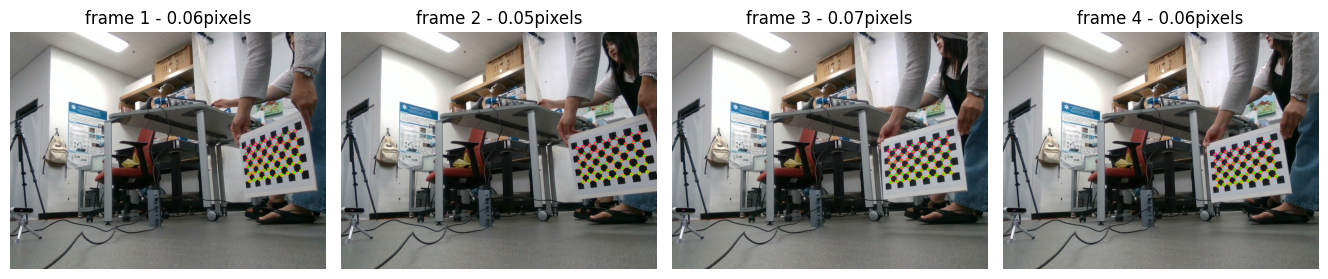

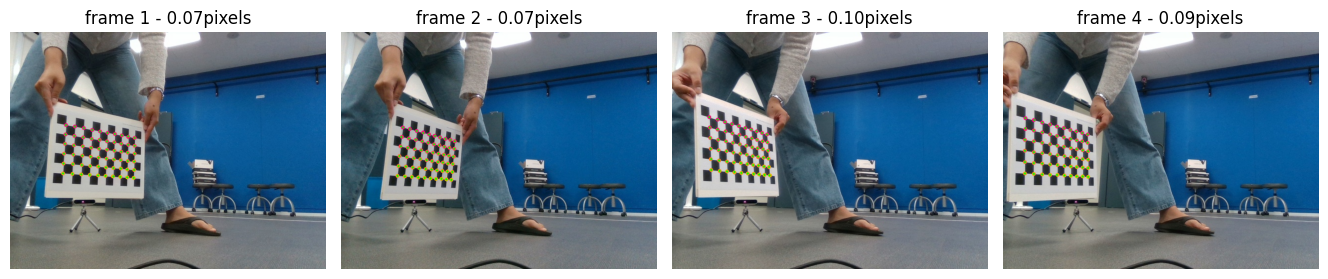

error_total: 0.0625
error_total: 0.0828


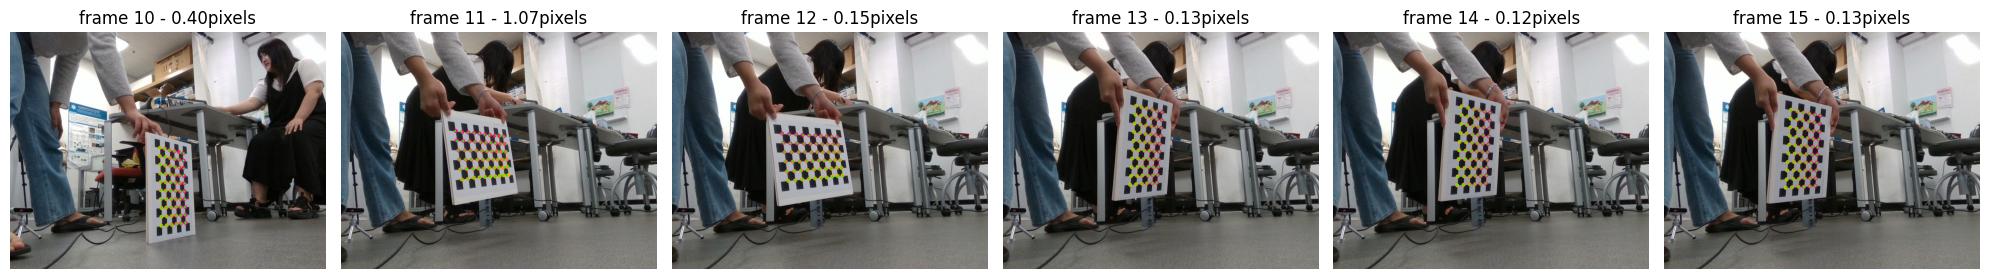

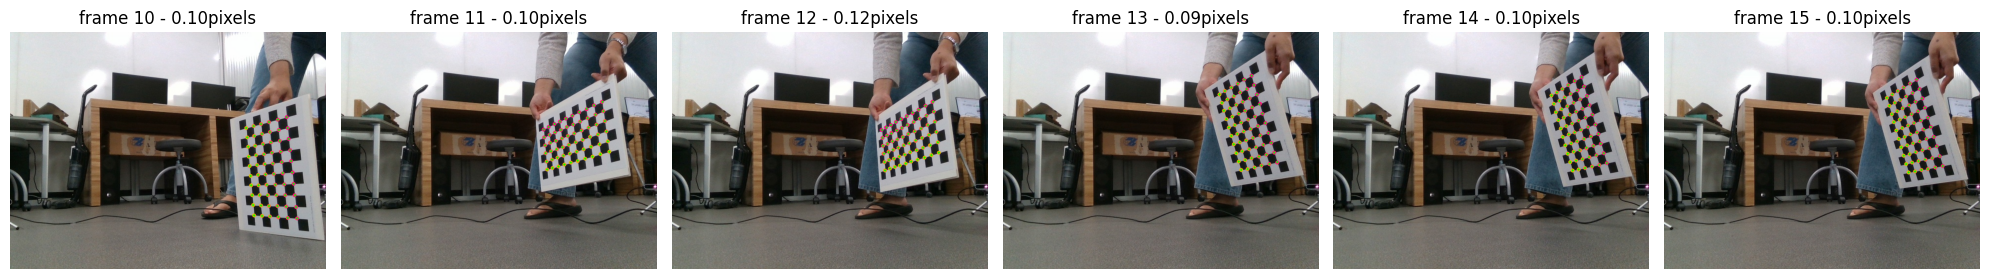

error_total: 0.3308
error_total: 0.1033


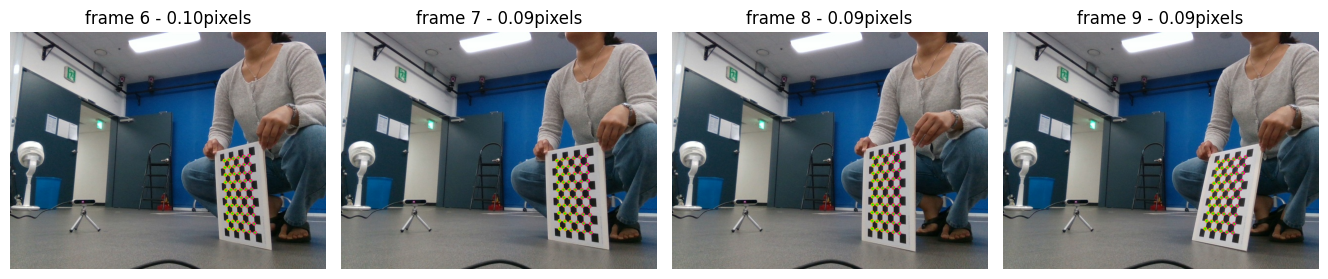

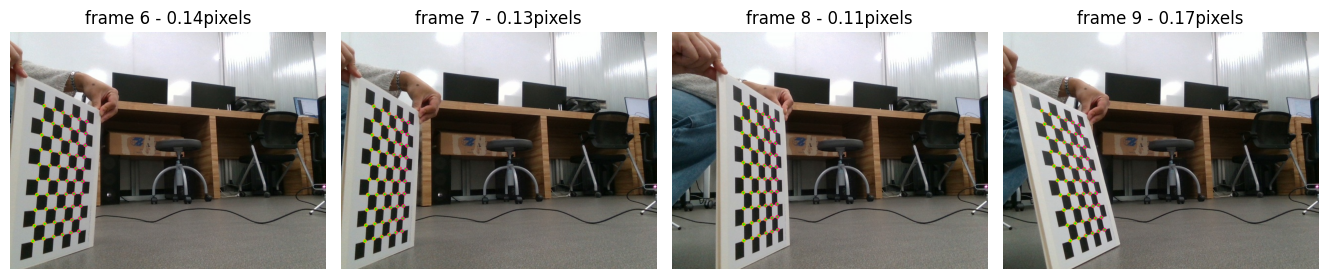

error_total: 0.0932
error_total: 0.1385


In [172]:
def visualize_reprojection_errors(objpoints, imgpoints, K, dist, rvecs, tvecs, image_paths, indices, w=20, h=8):
    error_total = []
    pt_proj_total = []
    plt.figure(figsize=(w,h))
    cmap = plt.cm.get_cmap('rainbow', w*h)  # 서로 다른 색상 생성 (포인트 개수만큼)
    objpoint = generate_object_points(pattern_size, square_size=0.025)
    for cnt, idx in enumerate(indices):
        img = cv2.imread(image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        corners_detected = imgpoints[idx]
        projected_points, _ = cv2.projectPoints(objpoint, rvecs[idx], tvecs[idx], K, dist)

#         pt_proj_temp = []
        for j in range(len(projected_points)):
            pt_proj = tuple(projected_points[j][0].astype(int))
            pt_actual = tuple(corners_detected[j][0].astype(int))
            
            # matplotlib colormap은 0~1 범위이므로 0~255로 변환
            color = (np.array(cmap(j)[:3]) * 255).astype(np.uint8)
            color_bgr = tuple(int(c) for c in color[::-1])  # RGB → BGR 변환

            cv2.circle(img, pt_proj, 4, color_bgr, -1)       # 다양한 색: 재투영 포인트
            cv2.circle(img, pt_actual, 2, (0, 255, 0), -1)   # 초록: 실제 검출점
#             pt_proj_temp.append(pt_proj)
        pt_proj_total.append(projected_points)
            
        error = np.linalg.norm(corners_detected.squeeze() - projected_points.squeeze(), axis=1)
        mean_error = error.mean()
        error_total.append(mean_error)
#         print(f"[{i}] Mean reprojection error: {mean_error:.4f} pixels")
        # 시각화
#         plt.figure(figsize=(8,6))
        col = 6
        plt.subplot(len(indices)//col+1,col,cnt+1)
        plt.imshow(img)
#         plt.title(f"Reprojection vs Actual (frame {i})")
        plt.title(f"frame {idx} - {mean_error:.2f}pixels")
        plt.axis('off')
        plt.tight_layout()
    plt.show()
    plt.close()
    return error_total, pt_proj_total

num_cams = 3
rgb_paths = []
depth_paths = []
for i in range(num_cams):
    rgb_paths.append(nat(glob(f"{root_folder}/cam{i}/rgb_*.jpg")))
    depth_paths.append(nat(glob(f"{root_folder}/cam{i}/depth_*.png")))

for cam1, cam2 in [(0,1), (0,2), (1,2)]:
    objpoints, imgpoints1, imgpoints2, image_size = results_corner[f"{cam1}_{cam2}"]
    result = results_stereo[f"{cam1}_{cam2}"]
    cam_pair = matches[(cam1,cam2)]
    

    rvecs1 = result["rvecs1"]
    tvecs1 = result["tvecs1"]
    error_total_1, pt_proj_total_1 = visualize_reprojection_errors(
        objpoints=objpoints,
        # imgpoints=imgpoints1,
        imgpoints=corners_found[cam1],
        K=result['cameraMatrix1'],
        dist=result['distCoeffs1'],
        rvecs=rvecs1,
        tvecs=tvecs1,
        image_paths=rgb_paths[cam1],
        indices=cam_pair,
        w=20, h=12
    )

    rvecs2 = result["rvecs2"]
    tvecs2 = result["tvecs2"]
    error_total_2, pt_proj_total_2 = visualize_reprojection_errors(
        objpoints=objpoints,
        # imgpoints=imgpoints2,
        imgpoints=corners_found[cam2],
        K=result['cameraMatrix2'],
        dist=result['distCoeffs2'],
        rvecs=rvecs2,
        tvecs=tvecs2,
        image_paths=rgb_paths[cam2],
        indices=cam_pair,
        w=20, h=12
    )
    print(f"error_total: {np.array(error_total_1).mean():.4f}")
    print(f"error_total: {np.mean(error_total_2):.4f}")

In [87]:
import os
import cv2
import numpy as np
import open3d as o3d

# ===============================
# 설정
# ===============================
pattern_size = (10, 6)   # 내부 코너수 (cols, rows)
square_size  = 0.025     # 한 칸(m)
# imgpoints1, imgpoints2, objpoints, image_size, rgb_paths1/2, indices 등은
# 사용자의 기존 파이프라인에서 이미 확보되어 있다고 가정합니다.

# ===============================
# 유틸
# ===============================
def generate_object_points(pattern_size, square_size):
    objp = np.zeros((pattern_size[0]*pattern_size[1], 3), np.float32)
    objp[:,:2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1,2)
    objp *= square_size
    return objp

def rodrigues(rvec):
    R, _ = cv2.Rodrigues(rvec)
    return R

def camera_center_in_world(R, t):
    # C = -R^T t
    return (-R.T @ t.reshape(3,1)).reshape(3)

def cam_pose_4x4_in_world(R, t):
    # world<-cam 변환: [R^T | -R^T t]
    T = np.eye(4)
    T[:3,:3] = R.T
    T[:3, 3] = camera_center_in_world(R, t)
    return T

def make_axis(size=0.05):
    return o3d.geometry.TriangleMesh.create_coordinate_frame(size=size)

# 카메라 프러스텀(대략적) 메시 생성 (시각화용)
def make_camera_frustum(K, img_size, scale=0.1, color=(0.1,0.1,0.1)):
    fx, fy, cx, cy = K[0,0], K[1,1], K[0,2], K[1,2]
    w, h = img_size
    # z=1 평면의 4코너를 카메라좌표로 역투영 → z=scale로 스케일
    corners_px = np.array([[0,0],[w,0],[w,h],[0,h]], dtype=np.float32)
    rays = []
    for u,v in corners_px:
        x = (u - cx)/fx
        y = (v - cy)/fy
        rays.append([x*scale, y*scale, scale])
    rays = np.array(rays)
    # 원점 + 4코너로 라인세트 구성
    points = np.vstack([np.zeros((1,3)), rays])  # 0: origin
    lines  = [[0,1],[0,2],[0,3],[0,4],[1,2],[2,3],[3,4],[4,1]]
    colors = [color for _ in lines]
    ls = o3d.geometry.LineSet()
    ls.points = o3d.utility.Vector3dVector(points.astype(np.float64))
    ls.lines  = o3d.utility.Vector2iVector(np.array(lines, dtype=np.int32))
    ls.colors = o3d.utility.Vector3dVector(np.array(colors, dtype=np.float64))
    return ls

# ===============================
# (A) K, D가 이미 있는 경우: 프레임별 solvePnP
# ===============================
def pose_from_pnp_per_frame(objpoints, imgpoints, K, D):
    """각 프레임에 대해 solvePnP로 (R,t) 추정.
       objpoints: [N_frames x (N_pts,3)]
       imgpoints: [N_frames x (N_pts,1,2)]
    """
    rvecs, tvecs = [], []
    for i in range(len(objpoints)):
        # 왜곡 보정한 픽셀 좌표 사용 권장
        und = cv2.undistortPoints(imgpoints[i], K, D, P=K).reshape(-1,1,2)
        ok, rvec, tvec = cv2.solvePnP(objpoints[i], und, K, np.zeros((5,1)), flags=cv2.SOLVEPNP_ITERATIVE)
        if not ok:
            raise RuntimeError(f"solvePnP failed at frame {i}")
        rvecs.append(rvec)
        tvecs.append(tvec)
    return rvecs, tvecs

# ===============================
# (B) K, D가 없는 경우: 단일카메라 보정 → 포즈
# ===============================
def calibrate_single_and_poses(objpoints, imgpoints, image_size):
    """여러 프레임으로 K,D,R,t 동시 추정 (calibrateCamera)."""
    ret, K, D, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
    # rvecs,tvecs는 각 프레임의 월드(체커보드)→카메라 변환
    return K, D, rvecs, tvecs, ret

# ===============================
# 시각화: 체커보드(원점) + 두 카메라 포즈
# ===============================
def visualize_board_and_cameras(
    K1, D1, K2, D2,
    rvecs1, tvecs1, rvecs2, tvecs2,
    frame_idx, image_size
):
    # 선택 프레임의 포즈
    R1 = rodrigues(rvecs1[frame_idx]); t1 = tvecs1[frame_idx]
    R2 = rodrigues(rvecs2[frame_idx]); t2 = tvecs2[frame_idx]

    # 보드(원점) 좌표축
    axis_board = make_axis(size=0.05)

    # 각 카메라의 월드(보드) 좌표계에서의 포즈(프레임)
    T_cam1 = cam_pose_4x4_in_world(R1, t1)
    T_cam2 = cam_pose_4x4_in_world(R2, t2)

    # 카메라 좌표축 메시
    axis_cam1 = make_axis(size=0.05).transform(T_cam1)
    axis_cam2 = make_axis(size=0.05).transform(T_cam2)

    # 카메라 프러스텀(대략)
    fr1 = make_camera_frustum(K1, image_size, scale=0.15, color=(0,0,1))
    fr2 = make_camera_frustum(K2, image_size, scale=0.15, color=(1,0,0))
    fr1.transform(T_cam1)
    fr2.transform(T_cam2)

    # (선택) 체커보드 평면 메시(얕은 사각형)
    cols, rows = pattern_size
    board_w = (cols-1)*square_size
    board_h = (rows-1)*square_size
    plane = o3d.geometry.TriangleMesh.create_box(width=board_w, height=board_h, depth=1e-4)
    plane.translate([0,0, -5e-5])  # Z=0 평면에 살짝 겹치게
    plane.paint_uniform_color([0.85,0.85,0.85])

    o3d.visualization.draw_geometries([axis_board, plane, axis_cam1, axis_cam2, fr1, fr2])

# ===============================
# 사용 예시
# ===============================
# 준비물:
# - objpoints, imgpoints1, imgpoints2, image_size
#   (사용자 코드 load_corners_for_pair(...) 결과를 그대로 활용)
# - K1,D1,K2,D2가 이미 있다면 (stereo/mono 보정 결과),
#   그대로 (A) 경로로 solvePnP만 돌리면 됩니다.

objpoints, imgpoints1, imgpoints2, image_size = results_corner[f"{cam1}_{cam2}"]

# Case A: 이미 intrinsics가 있을 때 (권장: 정밀)
# result = results_stereo[f"{cam1}_{cam2}"]
# K1, D1 = result['cameraMatrix1'], result['distCoeffs1']
# K2, D2 = result['cameraMatrix2'], result['distCoeffs2']
# rvecs1, tvecs1 = pose_from_pnp_per_frame(objpoints, imgpoints1, K1, D1)
# rvecs2, tvecs2 = pose_from_pnp_per_frame(objpoints, imgpoints2, K2, D2)
# Case B: intrinsics가 없을 때 (각 카메라별 단일 보정)
K1, D1, rvecs1, tvecs1, _ = calibrate_single_and_poses(objpoints, imgpoints1, image_size)
K2, D2, rvecs2, tvecs2, _ = calibrate_single_and_poses(objpoints, imgpoints2, image_size)

print("rvecs1",rvecs1)
print("tvecs1",tvecs1)
print("rvecs2",rvecs2)
print("tvecs2",tvecs2)
# 시각화 (예: 첫 공통 프레임)
frame_idx = 0
visualize_board_and_cameras(K1, D1, K2, D2, rvecs1, tvecs1, rvecs2, tvecs2, frame_idx, image_size)

rvecs1 (array([[0.99287447],
       [1.04363328],
       [1.26513756]]), array([[0.80643031],
       [0.88304501],
       [1.36219527]]), array([[0.82446635],
       [0.97208162],
       [1.37661823]]), array([[0.7100533 ],
       [1.21898099],
       [1.49218853]]))
tvecs1 (array([[ 0.31468415],
       [-0.08645333],
       [ 0.77656632]]), array([[ 0.34072502],
       [-0.08625103],
       [ 0.78366555]]), array([[ 0.27019557],
       [-0.08987798],
       [ 0.76142454]]), array([[ 0.32499258],
       [-0.08010154],
       [ 0.7619674 ]]))
rvecs2 (array([[-1.07386366],
       [-0.98252237],
       [ 1.40115485]]), array([[-1.2206734 ],
       [-1.08732428],
       [ 1.32076649]]), array([[-1.14503321],
       [-0.8822678 ],
       [ 1.3002648 ]]), array([[-1.35370682],
       [-0.7422872 ],
       [ 1.04489666]]))
tvecs2 (array([[-0.34514919],
       [-0.08909965],
       [ 0.62231293]]), array([[-0.37382494],
       [-0.08801547],
       [ 0.63209316]]), array([[-0.25741765],
      

In [181]:
import numpy as np
import cv2
import open3d as o3d

DEPTH_SCALE = 0.001   # mm→m 변환
MIN_Z, MAX_Z = 0.05, 1.5  # m

# -----------------------------
# ROI 마스크 생성 (보드 영역만)
# -----------------------------
def board_mask(rgb_shape, K, rvec, tvec, pattern_size, square_size, margin=3):
    """보드 네 모서리를 투영해 마스크 생성"""
    cols, rows = pattern_size
    W = (cols-1) * square_size
    H = (rows-1) * square_size
    corners_w = np.array([[0,0,0],[W,0,0],[W,H,0],[0,H,0]], np.float32).reshape(-1,1,3)
    img_pts, _ = cv2.projectPoints(corners_w, rvec, tvec, K, None)
    poly = img_pts.reshape(-1,2).astype(np.int32)
    mask = np.zeros(rgb_shape[:2], np.uint8)
    cv2.fillConvexPoly(mask, poly, 255)
    if margin > 0:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*margin+1, 2*margin+1))
        mask = cv2.dilate(mask, kernel)
    return mask

# -----------------------------
# depth+rgb → 보드(월드) 좌표계 점군
# -----------------------------
def depth_to_colored_pointcloud_world(depth_path, rgb_path, K, D, rvec, tvec, stride=4,
                                      use_board_roi=False, pattern_size=None, square_size=None, margin=3):
    depth_raw = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
    rgb_img   = cv2.cvtColor(cv2.imread(rgb_path), cv2.COLOR_BGR2RGB)
    if depth_raw is None or rgb_img is None:
        raise FileNotFoundError("Depth or RGB image not found.")

    if depth_raw.dtype != np.float32:
        depth = depth_raw.astype(np.float32) * DEPTH_SCALE
    else:
        depth = depth_raw

    fx, fy = K[0,0], K[1,1]
    cx, cy = K[0,2], K[1,2]
    h, w = depth.shape

    R, _ = cv2.Rodrigues(rvec)
    t = tvec.reshape(3)
#     R = rvec
#     t = tvec

    # ROI 마스크 적용
    if use_board_roi:
        if pattern_size is None or square_size is None:
            raise ValueError("pattern_size, square_size must be provided when use_board_roi=True")
        mask = board_mask(rgb_img.shape, K, rvec, tvec, pattern_size, square_size, margin)
    else:
        mask = None

    points_world, colors = [], []
    for v in range(0, h, stride):
        for u in range(0, w, stride):
            if mask is not None and mask[v, u] == 0:
                continue
            z = depth[v, u]
            if z < MIN_Z or z > MAX_Z or z <= 0 or np.isnan(z):
                continue
            x = (u - cx) * z / fx
            y = (v - cy) * z / fy
            X_cam = np.array([x, y, z], dtype=np.float32)
            X_world = R.T @ (X_cam - t)  # cam → board(world)
            points_world.append(X_world)
            colors.append(rgb_img[v, u] / 255.0)

    if not points_world:
        return np.empty((0,3), np.float32), np.empty((0,3), np.float32)
    return np.asarray(points_world, np.float32), np.asarray(colors, np.float32)

def make_colored_pcd(points, colors):
    pcd = o3d.geometry.PointCloud()
    if points.size > 0:
        pcd.points = o3d.utility.Vector3dVector(points)
        pcd.colors = o3d.utility.Vector3dVector(colors)
    return pcd

def visualize_two_colored_depthmaps_in_world(
    depth_path1, rgb_path1, K1, D1, rvec1, tvec1,
    depth_path2, rgb_path2, K2, D2, rvec2, tvec2,
    stride=4
):
    pts1_world, col1 = depth_to_colored_pointcloud_world(depth_path1, rgb_path1, K1, D1, rvec1, tvec1, stride)
    pts2_world, col2 = depth_to_colored_pointcloud_world(depth_path2, rgb_path2, K2, D2, rvec2, tvec2, stride)

    pcd1 = make_colored_pcd(pts1_world, col1)
    pcd2 = make_colored_pcd(pts2_world, col2)

    axis_board = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)

    o3d.visualization.draw_geometries([axis_board, pcd1, pcd2])
    return pcd1, pcd2

# -----------------------
# 사용 예시
# -----------------------
# result = results_stereo[f"{cam1}_{cam2}"]
# K1, D1 = result['cameraMatrix1'], result['distCoeffs1']
# K2, D2 = result['cameraMatrix2'], result['distCoeffs2']
# rvecs1, tvecs1 = result['rvecs1'], result['tvecs1']
# rvecs2, tvecs2 = result['rvecs2'], result['tvecs2']
    
    
# test_rvec1, _ = cv2.Rodrigues(rvecs1[frame_idx])
# test_tvec1 = tvecs1[frame_idx].reshape(3)

# R, _ = cv2.Rodrigues(rvecs2[frame_idx])
# T = tvecs2[frame_idx].reshape(3)

# test_rvec2 = R @ test_rvec1.T
# test_tvec2 = T - test_rvec1 @ T


# test_rvec1, _ = cv2.Rodrigues(rvecs1[frame_idx])
# test_tvec2 = tvecs1[frame_idx].reshape(3)
# test_rvec2, _ = cv2.Rodrigues(rvecs2[frame_idx])
# test_tvec2 = tvecs2[frame_idx].reshape(3)
K1, D1, rvecs1, tvecs1, _ = calibrate_single_and_poses(objpoints, imgpoints1, image_size)
K2, D2, rvecs2, tvecs2, _ = calibrate_single_and_poses(objpoints, imgpoints2, image_size)
frame_idx = 0
f0 = visualize_two_colored_depthmaps_in_world(
    depth_paths1[frame_idx], rgb_paths1[frame_idx], K1, D1, rvecs1[frame_idx], tvecs1[frame_idx],
    depth_paths2[frame_idx], rgb_paths2[frame_idx], K2, D2, rvecs2[frame_idx], tvecs2[frame_idx],
    stride=4
)


In [183]:
f0[0].R

AttributeError: 'open3d.cpu.pybind.geometry.PointCloud' object has no attribute 'R'

In [180]:
import numpy as np
import cv2
import open3d as o3d

DEPTH_SCALE = 0.001
MIN_Z, MAX_Z = 0.05, 1.5

# -----------------------------
# 기존: depth+rgb → 보드(월드) 좌표계 점군
# -----------------------------
def depth_to_colored_pointcloud_world(depth_path, rgb_path, K, D, rvec, tvec, stride=4):
    depth_raw = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
    rgb_img   = cv2.cvtColor(cv2.imread(rgb_path), cv2.COLOR_BGR2RGB)
    if depth_raw is None or rgb_img is None:
        raise FileNotFoundError("Depth or RGB image not found.")

    if depth_raw.dtype != np.float32:
        depth = depth_raw.astype(np.float32) * DEPTH_SCALE
    else:
        depth = depth_raw

    fx, fy = K[0,0], K[1,1]
    cx, cy = K[0,2], K[1,2]
    h, w = depth.shape

    R, _ = cv2.Rodrigues(rvec)
    t = tvec.reshape(3)

    points_world, colors = [], []
    for v in range(0, h, stride):
        for u in range(0, w, stride):
            z = depth[v, u]
            if z < MIN_Z or z > MAX_Z or z <= 0 or np.isnan(z):
                continue
            x = (u - cx) * z / fx
            y = (v - cy) * z / fy
            X_cam = np.array([x, y, z], dtype=np.float32)
            X_world = R.T @ (X_cam - t)  # cam → board(world)
            points_world.append(X_world)
            colors.append(rgb_img[v, u] / 255.0)

    if not points_world:
        return np.empty((0,3), np.float32), np.empty((0,3), np.float32)
    return np.asarray(points_world, np.float32), np.asarray(colors, np.float32)

def make_colored_pcd(points, colors):
    pcd = o3d.geometry.PointCloud()
    if points.size > 0:
        pcd.points = o3d.utility.Vector3dVector(points.astype(np.float64))
        pcd.colors = o3d.utility.Vector3dVector(colors.astype(np.float64))
    return pcd

# -----------------------------
# 보조: 전처리(다운샘플/노말/아웃라이어 제거)
# -----------------------------
def preprocess_pcd(pcd, voxel=0.005, nb_neighbors=20, std_ratio=2.0, estimate_normals=True):
    if voxel and voxel > 0:
        pcd = pcd.voxel_down_sample(voxel_size=voxel)
    if estimate_normals:
        pcd.estimate_normals(
            search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=voxel*3 if voxel else 0.02, max_nn=30)
        )
        pcd.orient_normals_consistent_tangent_plane(50)
    if nb_neighbors > 0:
        pcd, _ = pcd.remove_statistical_outlier(nb_neighbors=nb_neighbors, std_ratio=std_ratio)
    return pcd

# -----------------------------
# 멀티스케일 point-to-plane ICP (강건 커널)
# -----------------------------
def icp_multiscale(source, target, voxel_scales=(0.02, 0.01, 0.005), max_iters=(50, 30, 20)):
    assert len(voxel_scales) == len(max_iters)
    T = np.eye(4)
    current_src = source
    for scale, iters in zip(voxel_scales, max_iters):
        src = preprocess_pcd(current_src, voxel=scale)
        tgt = preprocess_pcd(target,       voxel=scale)

        loss = o3d.pipelines.registration.TukeyLoss(k=scale*3.0)
        est  = o3d.pipelines.registration.TransformationEstimationPointToPlane(loss)
        crit = o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=iters)

        reg = o3d.pipelines.registration.registration_icp(
            src, tgt, max_correspondence_distance=scale*4.0,
            init=T, estimation_method=est, criteria=crit
        )
        T = reg.transformation
        # 다음 레벨 입력을 위해 원본 source에 누적 변환 적용
        current_src = source.transform(T.copy())
        print(f"[ICP] scale={scale:.3f} iters={iters}  fitness={reg.fitness:.3f}  rmse={reg.inlier_rmse:.4f}")
    return T

# -----------------------------
# 포즈(rvec,tvec) 갱신(선택)
#   - pcd2는 world 좌표에서 T_icp로 보정됨: X'_world = T_icp * X_world
#   - cam2의 world 포즈(4x4)도 동일하게 왼쪽곱으로 갱신: World_T_Cam2' = T_icp * World_T_Cam2
#   - 이후 역변환해 board->cam 형식(R',t') 추출
# -----------------------------
def world_T_cam_from_rt(R, t):
    # world<-cam = [R^T | -R^T t]
    T = np.eye(4)
    T[:3,:3] = R.T
    T[:3, 3] = (-R.T @ t.reshape(3,)).reshape(3,)
    return T

def rt_from_world_T_cam(Twc):
    # Twc = [R^T | -R^T t] → (R,t)
    Rcam = Twc[:3,:3].T
    tcam = -Rcam @ Twc[:3,3]
    rvec, _ = cv2.Rodrigues(Rcam)
    return rvec.reshape(3,1), tcam.reshape(3,1)

# -----------------------------
# 메인: 두 점군 생성 → ICP 정합 → 시각화 (+옵션: cam2 포즈 업데이트)
# -----------------------------
def visualize_two_colored_depthmaps_icp(
    depth_path1, rgb_path1, K1, D1, rvec1, tvec1,
    depth_path2, rgb_path2, K2, D2, rvec2, tvec2,
    stride=4, do_update_pose=False
):
    # 1) 점군 생성(보드=월드 좌표)
    pts1, col1 = depth_to_colored_pointcloud_world(depth_path1, rgb_path1, K1, D1, rvec1, tvec1, stride)
    pts2, col2 = depth_to_colored_pointcloud_world(depth_path2, rgb_path2, K2, D2, rvec2, tvec2, stride)
    pcd1 = make_colored_pcd(pts1, col1)
    pcd2 = make_colored_pcd(pts2, col2)

    # 2) ICP (pcd2 → pcd1)
    T_icp = icp_multiscale(pcd2, pcd1, voxel_scales=(0.02, 0.01, 0.005, 0.0001), max_iters=(120, 160, 180, 200))
    pcd2.transform(T_icp)

    # 3) 시각화
    axis = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)
    o3d.visualization.draw_geometries([axis, pcd1, pcd2])

    # 4) (선택) cam2 포즈 보정치 반영
    updated = None
    if do_update_pose:
        R2, _ = cv2.Rodrigues(rvec2)
        Twc2  = world_T_cam_from_rt(R2, tvec2)   # world<-cam2
        Twc2_ = T_icp @ Twc2                     # 보정된 world<-cam2
        rvec2_new, tvec2_new = rt_from_world_T_cam(Twc2_)
        updated = (rvec2_new, tvec2_new)
        print("[ICP] cam2 pose updated (rvec2_new, tvec2_new) returned.")
    return T_icp, updated

# -----------------------
# 사용 예시
# -----------------------
# result = results_stereo[f"{cam1}_{cam2}"]
# K1, D1 = result['cameraMatrix1'], result['distCoeffs1']
# K2, D2 = result['cameraMatrix2'], result['distCoeffs2']
# rvecs1, tvecs1 = result['rvecs1'], result['tvecs1']
# rvecs2, tvecs2 = result['rvecs2'], result['tvecs2']

frame_idx = 0
T_icp, upd = visualize_two_colored_depthmaps_icp(
    depth_paths1[frame_idx], rgb_paths1[frame_idx], K1, D1, rvecs1[frame_idx], tvecs1[frame_idx],
    depth_paths2[frame_idx], rgb_paths2[frame_idx], K2, D2, rvecs2[frame_idx], tvecs2[frame_idx],
    stride=2, do_update_pose=True
)
if upd is not None:
    rvec2_new, tvec2_new = upd
    # 이후 rvec2_new, tvec2_new를 사용해 후속 프레임 정합 시도 가능


KeyError: 0

In [11]:
upd

(array([[-0.18294281],
        [ 0.5222429 ],
        [ 0.07626606]]),
 array([[ 0.1133923 ],
        [-0.03355416],
        [ 1.0463853 ]]))

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 0.76242774724960327, 0.2764401681605429, 1.2426385879516602 ],
			"boundingbox_min" : [ -1.0599851609456028, -0.54637957015794991, -0.676524041631545 ],
			"field_of_view" : 60.0,
			"front" : [ -0.17337963820437918, -0.76286002525358221, -0.62288368330389154 ],
			"lookat" : [ 0.42439663092491814, 0.46403758132132122, 0.21311030308181383 ],
			"up" : [ -0.23339872472077761, -0.58261800026311616, 0.77851223565729677 ],
			"zoom" : 0.29999999999999966
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

In [30]:
import numpy as np, cv2, open3d as o3d

# ---- 설정 (센서에 맞게) ----
DEPTH_SCALE = 0.001  # mm->m면 0.001, 이미 m면 1.0
MIN_Z, MAX_Z = 0.05, 5.0
SAMPLE_STRIDE = 2     # 코너 주변 샘플 stride (픽셀)
NEIGHBOR_RAD   = 2    # 코너 주변 샘플 반경 (픽셀)

# ========= 유틸 =========
def rodrigues(rvec):  # (3,)->(3,3)
    R,_ = cv2.Rodrigues(rvec); return R

def board_plane_in_cam(R, t):
    """보드 z=0 평면을 카메라 좌표에서 ax+by+cz+d=0로 반환.
       보드 원점(0,0,0)의 카메라 좌표는 t, 보드 z축의 카메라 표현은 R[:,2]."""
    n = R[:,2]               # 평면 법선 (cam frame)
    d = - float(n @ t.reshape(3))    # n·(x - t)=0 -> n·x - n·t =0
    return n, d

def ray_dir_from_pixel(u, v, K):
    fx, fy, cx, cy = K[0,0], K[1,1], K[0,2], K[1,2]
    return np.array([(u-cx)/fx, (v-cy)/fy, 1.0], dtype=np.float64)

def predict_depth_on_plane(u, v, K, n, d):
    """픽셀 (u,v)에 대한 보드 평면과의 교점 z(깊이, 카메라 z)를 예측."""
    r = ray_dir_from_pixel(u, v, K)   # 원점(0,0,0)에서 나가는 광선
    denom = float(n @ r)
    if abs(denom) < 1e-9: return np.nan
    s = -d / denom
    if s <= 0: return np.nan
    X = s * r
    return float(X[2])  # 카메라 z

def undistort_pts(pts, K, D):
    return cv2.undistortPoints(pts, K, D, P=K).reshape(-1,2)

def neighborhood(pix, step=2, rad=2):
    offs = np.arange(-rad, rad+1, step)
    grid = np.stack(np.meshgrid(offs,offs), -1).reshape(-1,2)
    out=[]
    for p in pix: out.append(p+grid)
    return np.vstack(out).astype(np.float64)

def load_depth(path):
    d = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if d is None: raise FileNotFoundError(path)
    d = d.astype(np.float32)
    if d.max() > 50:  # 보통 mm 스케일
        d *= DEPTH_SCALE
    return d

def residuals_depth_vs_plane(depth, K, pts_px, n, d):
    """깊이-평면 잔차(측정 z - 예측 z) [m]"""
    H,W = depth.shape
    res=[]
    for (u,v) in pts_px:
        ui,vi = int(round(u)), int(round(v))
        if ui<0 or ui>=W or vi<0 or vi>=H: continue
        z_meas = float(depth[vi,ui])
        if not np.isfinite(z_meas) or z_meas<MIN_Z or z_meas>MAX_Z: continue
        z_pred = predict_depth_on_plane(u,v,K,n,d)
        if np.isnan(z_pred): continue
        res.append(z_meas - z_pred)
    return np.array(res, dtype=np.float64)

def backproject_pixels_to_cam(pts_px, depth, K):
    fx, fy, cx, cy = K[0,0], K[1,1], K[0,2], K[1,2]
    H,W = depth.shape
    X=[]
    for (u,v) in pts_px:
        ui,vi = int(round(u)), int(round(v))
        if ui<0 or ui>=W or vi<0 or vi>=H: continue
        z = float(depth[vi,ui])
        if not np.isfinite(z) or z<MIN_Z or z>MAX_Z: continue
        x = (u-cx)*z/fx; y = (v-cy)*z/fy
        X.append([x,y,z])
    return np.asarray(X, np.float64)

def to_world_from_cam(X_cam, R, t):
    if X_cam.size==0: return X_cam
    return (X_cam - t.reshape(1,3)) @ R.T

def fit_plane_svd(X):  # x mean-centered, n from smallest singular vector
    if X.shape[0] < 3: return np.array([np.nan,np.nan,np.nan]), np.nan
    c = X.mean(axis=0)
    U,S,Vt = np.linalg.svd(X - c, full_matrices=False)
    n = Vt[-1]  # unit
    d = - n @ c
    return n, d

def angle_between_normals(n1, n2):
    if np.any(~np.isfinite(n1)) or np.any(~np.isfinite(n2)): return np.nan
    cs = np.clip(np.dot(n1/np.linalg.norm(n1), n2/np.linalg.norm(n2)), -1, 1)
    return np.degrees(np.arccos(cs))

# ========= 1) 카메라별: depth vs. 보드 평면 검증 =========
def check_depth_vs_board_for_cam(depth_path, K, D, rvec, tvec, imgpoints_frame, dense=True):
    depth = load_depth(depth_path)
    R = rodrigues(rvec); t = tvec.reshape(3)
    n, d = board_plane_in_cam(R, t)

    # 코너(또는 주변) 픽셀 샘플
    pts = undistort_pts(imgpoints_frame, K, D)
    if dense: pts = neighborhood(pts, step=SAMPLE_STRIDE, rad=NEIGHBOR_RAD)

    # (A) 깊이-평면 잔차
    res = residuals_depth_vs_plane(depth, K, pts, n, d)
    if res.size == 0:
        print("No valid residuals.")
        return None

    # (B) 깊이 점군 → 월드에서 평면 적합 후 보드 평면과 비교(법선 각도, 거리)
    X_cam = backproject_pixels_to_cam(pts, depth, K)
    X_w   = to_world_from_cam(X_cam, R, t)
    n_fit, d_fit = fit_plane_svd(X_w)
    # 보드 평면(월드)은 z=0 → 법선 [0,0,1], d=0
    n_board = np.array([0,0,1.0])
    ang_fit_board = angle_between_normals(n_fit, n_board)
    # 월드에서의 평균 거리(평면 오차)
    dist_mean = np.abs((X_w @ n_board) + 0.0).mean() if X_w.size else np.nan

    print(f"[Depth vs Board] N={res.size}, mean(res)= {res.mean():.4f} m, median= {np.median(res):.4f} m, std= {res.std():.4f} m")
    print(f"[Depth plane fit] angle(depth_plane, board_plane)= {ang_fit_board:.3f} deg, mean |z|= {dist_mean:.4f} m")
    return {
        "residuals": res,
        "Xw": X_w,
        "n_fit": n_fit, "d_fit": d_fit,
        "angle_fit_board_deg": ang_fit_board,
        "mean_abs_z_m": dist_mean
    }

# ========= 2) 두 카메라: extrinsic 정렬 후 비교 =========
def compare_two_depth_planes_in_world(
    depth_path1, K1, D1, rvec1, tvec1, imgpoints1_frame,
    depth_path2, K2, D2, rvec2, tvec2, imgpoints2_frame
):
    R1, t1 = rodrigues(rvec1), rvec1*0 + tvec1.reshape(3)  # just shape
    R1 = rodrigues(rvec1); t1 = tvec1.reshape(3)
    R2 = rodrigues(rvec2); t2 = tvec2.reshape(3)

    # 각 카메라 depth → 월드(보드) 점군
    depth1 = load_depth(depth_path1); depth2 = load_depth(depth_path2)
    pts1 = undistort_pts(imgpoints1_frame, K1, D1)
    pts2 = undistort_pts(imgpoints2_frame, K2, D2)
    pts1 = neighborhood(pts1, step=SAMPLE_STRIDE, rad=NEIGHBOR_RAD)
    pts2 = neighborhood(pts2, step=SAMPLE_STRIDE, rad=NEIGHBOR_RAD)

    X1_w = to_world_from_cam(backproject_pixels_to_cam(pts1, depth1, K1), R1, t1)
    X2_w = to_world_from_cam(backproject_pixels_to_cam(pts2, depth2, K2), R2, t2)

    n1, d1 = fit_plane_svd(X1_w)
    n2, d2 = fit_plane_svd(X2_w)
    n_board = np.array([0,0,1.0])
    ang_12 = angle_between_normals(n1, n2)
    ang_1b = angle_between_normals(n1, n_board)
    ang_2b = angle_between_normals(n2, n_board)

    print(f"[Depth planes] angle(cam1_depth_plane, cam2_depth_plane)= {ang_12:.3f} deg")
    print(f"               angle(cam1_depth_plane, board_plane)= {ang_1b:.3f} deg")
    print(f"               angle(cam2_depth_plane, board_plane)= {ang_2b:.3f} deg")
    return {
        "X1_w": X1_w, "X2_w": X2_w,
        "n1": n1, "n2": n2,
        "angles": {"cam1_vs_cam2": ang_12, "cam1_vs_board": ang_1b, "cam2_vs_board": ang_2b}
    }

# ========= 3) 시각화(선택): 월드에서 보드 평면 + 두 depth 점군 =========
def visualize_world_with_board_and_depth(X1_w, X2_w):
    axis = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)
    objs = [axis]
    if X1_w.size:
        p1 = o3d.geometry.PointCloud()
        p1.points = o3d.utility.Vector3dVector(X1_w)
        p1.paint_uniform_color([0.2,0.4,1.0])  # cam1
        objs.append(p1)
    if X2_w.size:
        p2 = o3d.geometry.PointCloud()
        p2.points = o3d.utility.Vector3dVector(X2_w)
        p2.paint_uniform_color([1.0,0.3,0.3])  # cam2
        objs.append(p2)
    # 보드 평면 메시(월드 z=0)
    plane = o3d.geometry.TriangleMesh.create_box(width=1.0, height=1.0, depth=1e-4)
    plane.translate([0,0,-5e-5]); plane.paint_uniform_color([0.85,0.85,0.85])
    objs.append(plane)
    o3d.visualization.draw_geometries(objs)
# 준비: result = results_stereo[f"{cam1}_{cam2}"], objpoints, imgpoints1/2, depth_paths1/2, rgb_paths1/2 ...
K1,D1 = result['cameraMatrix1'], result['distCoeffs1']
K2,D2 = result['cameraMatrix2'], result['distCoeffs2']
rvecs1,tvecs1 = result['rvecs1'], result['tvecs1']
rvecs2,tvecs2 = result['rvecs2'], result['tvecs2']

i = 0  # 검사할 공통 프레임 인덱스
diag1 = check_depth_vs_board_for_cam(depth_paths1[i], K1, D1, rvecs1[i], tvecs1[i], imgpoints1[i], dense=True)
diag2 = check_depth_vs_board_for_cam(depth_paths2[i], K2, D2, rvecs2[i], tvecs2[i], imgpoints2[i], dense=True)

pair = compare_two_depth_planes_in_world(
    depth_paths1[i], K1, D1, rvecs1[i], tvecs1[i], imgpoints1[i],
    depth_paths2[i], K2, D2, rvecs2[i], tvecs2[i], imgpoints2[i]
)

visualize_world_with_board_and_depth(pair["X1_w"], pair["X2_w"])


[Depth vs Board] N=477, mean(res)= 0.1789 m, median= 0.0126 m, std= 0.2133 m
[Depth plane fit] angle(depth_plane, board_plane)= 77.244 deg, mean |z|= 0.1789 m
[Depth vs Board] N=431, mean(res)= 0.0118 m, median= 0.0108 m, std= 0.0046 m
[Depth plane fit] angle(depth_plane, board_plane)= 100.255 deg, mean |z|= 0.1105 m
[Depth planes] angle(cam1_depth_plane, cam2_depth_plane)= 137.636 deg
               angle(cam1_depth_plane, board_plane)= 77.244 deg
               angle(cam2_depth_plane, board_plane)= 100.255 deg


In [339]:
import numpy as np, cv2, open3d as o3d

DEPTH_SCALE = 0.001   # mm→m면 0.001
ZMIN, ZMAX = 0.05, 1.0

def undistort_depth_pixels(H, W, Kd, Dd, stride=4):
    """depth 픽셀 그리드를 왜곡보정한 뒤 '보정된 픽셀좌표' 반환 (Nx2).
       P=Kd로 줘서 보정 후에도 픽셀좌표계 유지."""
    grid_u, grid_v = np.meshgrid(np.arange(0,W,stride), np.arange(0,H,stride))
    pts = np.stack([grid_u.ravel(), grid_v.ravel()], axis=1).astype(np.float32).reshape(-1,1,2)
    pts_ud = cv2.undistortPoints(pts, Kd, Dd, P=Kd).reshape(-1,2)
    return pts_ud, pts.reshape(-1,2)  # (보정 후), (원래 픽셀 인덱스용)

def colored_pcd_world_from_raw_depth(
    depth_path, rgb_path,
    Kd, Dd,                      # depth intrinsics
    Rd2c, td2c,                  # depth->color extrinsic
    Kc, Dc,                      # color intrinsics (Dc는 투영엔 안씀)
    rvec_c, tvec_c,              # board->color pose (프레임별)
    stride=4, depth_scale=DEPTH_SCALE
):
    depth_raw = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
    rgb = cv2.cvtColor(cv2.imread(rgb_path), cv2.COLOR_BGR2RGB)
    if depth_raw is None or rgb is None:
        raise FileNotFoundError("depth or rgb missing")
    depth = depth_raw.astype(np.float32)
    if depth.max()>50: depth *= depth_scale  # 보통 mm→m

    H, W = depth.shape
    fx_d, fy_d, cx_d, cy_d = Kd[0,0], Kd[1,1], Kd[0,2], Kd[1,2]
    fx_c, fy_c, cx_c, cy_c = Kc[0,0], Kc[1,1], Kc[0,2], Kc[1,2]

    # 포즈 행렬
    Rc,_ = cv2.Rodrigues(rvec_c)
    tc = tvec_c.reshape(3)
    Rd2c = np.asarray(Rd2c, np.float64)
    td2c = np.asarray(td2c, np.float64).reshape(3)

    # depth 픽셀 좌표(보정 전/후)
    pts_ud, pts_orig = undistort_depth_pixels(H, W, Kd, Dd, stride=stride)

    pts_world = []
    cols = []
    for (u_ud, v_ud), (u0, v0) in zip(pts_ud, pts_orig):
        u, v = int(round(u0)), int(round(v0))
        if not (0<=u<W and 0<=v<H): continue
        z = float(depth[v,u])
        if not np.isfinite(z) or z<=ZMIN or z>=ZMAX: continue

        # depth 카메라 좌표 (undistort된 픽셀 사용)
        x_d = (u_ud - cx_d)*z/fx_d
        y_d = (v_ud - cy_d)*z/fy_d
        Xd = np.array([x_d, y_d, z], dtype=np.float64)

        # depth -> color
        Xc = Rd2c @ Xd + td2c

        # color 이미지 좌표로 투영해 색 샘플
        u_c = int(round(fx_c*Xc[0]/Xc[2] + cx_c))
        v_c = int(round(fy_c*Xc[1]/Xc[2] + cy_c))
        if not (0<=u_c<rgb.shape[1] and 0<=v_c<rgb.shape[0]): 
            continue
        color = rgb[v_c, u_c] / 255.0

        # color -> world(board): x_w = R^T (x_c - t)
        Xw = Rc.T @ (Xc - tc)
        pts_world.append(Xw)
        cols.append(color)

    if len(pts_world)==0:
        return o3d.geometry.PointCloud()
    pts_world = np.asarray(pts_world)
    cols = np.asarray(cols)

    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pts_world)
    pcd.colors = o3d.utility.Vector3dVector(cols)
    return pcd

def show_world_with_two_raw_depths(
    depth1, rgb1, Kd1, Dd1, Rd2c1, td2c1, Kc1, Dc1, rvec1, tvec1,
    depth2, rgb2, Kd2, Dd2, Rd2c2, td2c2, Kc2, Dc2, rvec2, tvec2,
    stride=4
):
    pcd1 = colored_pcd_world_from_raw_depth(depth1, rgb1, Kd1, Dd1, Rd2c1, td2c1, Kc1, Dc1, rvec1, tvec1, stride)
    pcd2 = colored_pcd_world_from_raw_depth(depth2, rgb2, Kd2, Dd2, Rd2c2, td2c2, Kc2, Dc2, rvec2, tvec2, stride)
    axis = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)
    o3d.visualization.draw_geometries([axis, pcd1, pcd2])
# 색 카메라 intrinsics/포즈 (이미 보유)
i = 0  # 보고 싶은 프레임

Kc1, Dc1 = result['cameraMatrix1'], result['distCoeffs1']
Kc2, Dc2 = result['cameraMatrix2'], result['distCoeffs2']
rvec1, tvec1 = result['rvecs1'][i], result['tvecs1'][i]   # 프레임 i
rvec2, tvec2 = result['rvecs2'][i], result['tvecs2'][i]

# (중요) 깊이 intrinsics/왜곡 + depth->color extrinsics (장비/SDK/별도보정에서 획득)
Kd1, Dd1 = Kd, Dd
Kd2, Dd2 = Kd, Dd
Rd2c1, td2c1 = R_d2c, t_d2c
Rd2c2, td2c2 = R_d2c, t_d2c

i = 0  # 보고 싶은 프레임
show_world_with_two_raw_depths(
    depth_paths1[i], rgb_paths1[i], Kd1, Dd1, Rd2c1, td2c1, Kc1, Dc1, rvec1, tvec1,
    depth_paths2[i], rgb_paths2[i], Kd2, Dd2, Rd2c2, td2c2, Kc2, Dc2, rvec2, tvec2,
    stride=3
)  

In [330]:
import pyrealsense2 as rs

pipeline = rs.pipeline()
cfg = rs.config()
cfg.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
cfg.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
profile = pipeline.start(cfg)

# 깊이 intrinsics
depth_intr = profile.get_stream(rs.stream.depth).as_video_stream_profile().get_intrinsics()
Kd = np.array([[depth_intr.fx, 0, depth_intr.ppx],
               [0, depth_intr.fy, depth_intr.ppy],
               [0, 0, 1]], dtype=np.float64)
Dd = np.array(depth_intr.coeffs)  # [k1,k2,p1,p2,k3]

# depth->color extrinsic
extr_d2c = profile.get_stream(rs.stream.depth).as_video_stream_profile().get_extrinsics_to(
           profile.get_stream(rs.stream.color))
R_d2c = np.array(extr_d2c.rotation).reshape(3,3)
t_d2c = np.array(extr_d2c.translation)  # meters

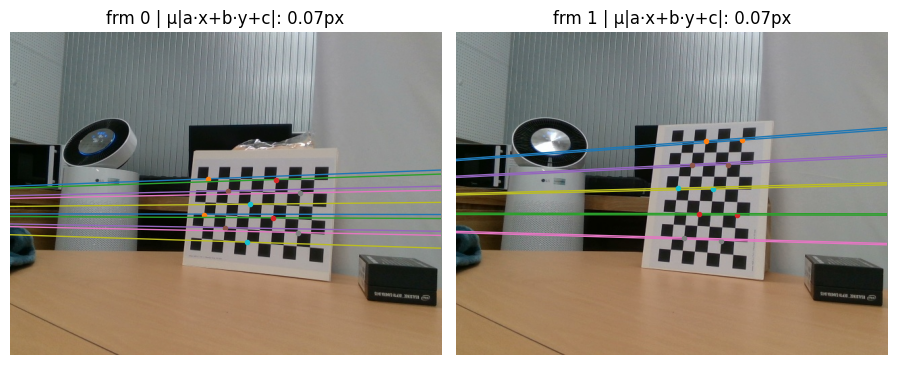

[Epipolar distance] 1->2 mean: 0.070 px, 2->1 mean: 0.074 px
[Sampson distance]  mean: 0.00375


In [264]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# === 1) 도우미: undistort & 정규화 ===
def undistort_points(pts, K, dist):
    # pts: (N,1,2) float32/64
    return cv2.undistortPoints(pts, K, dist, P=K)  # 픽셀 좌표계 유지

# 점-직선 거리 (픽셀)
def point_line_distance(pts, lines):
    # pts: (N,2), lines: (N,3) with ax+by+c=0
    a = lines[:,0]; b = lines[:,1]; c = lines[:,2]
    x = pts[:,0];   y = pts[:,1]
    return np.abs(a*x + b*y + c) / np.sqrt(a*a + b*b)

# Sampson distance (대칭 에피폴라 오차 근사)
def sampson_distance_batch(pts1, pts2, F):
    # pts*: (N,2) in pixels
    N = pts1.shape[0]
    ones = np.ones((N,1))
    x1 = np.hstack([pts1, ones])  # (N,3)
    x2 = np.hstack([pts2, ones])  # (N,3)

    Fx1 = (F @ x1.T).T            # (N,3)
    Ftx2 = (F.T @ x2.T).T         # (N,3)
    denom = Fx1[:,0]**2 + Fx1[:,1]**2 + Ftx2[:,0]**2 + Ftx2[:,1]**2
    num = np.sum(x2 * (F @ x1.T).T, axis=1)**2
    return num / denom

# === 2) 에피폴라 검증 및 시각화 ===
def verify_R_T_in_2D(objpoints, imgpoints1, imgpoints2, result, rgb_paths1, rgb_paths2,
                     vis_stride=5, max_draw=30, figsize=(20,12)):
    K1, D1 = result['cameraMatrix1'], result['distCoeffs1']
    K2, D2 = result['cameraMatrix2'], result['distCoeffs2']
    F = result['F']

    per_frame_metrics = []
    plt.figure(figsize=figsize)
    cols = 4
    rows = (len(objpoints) + cols - 1) // cols
    draw_frames = []

    for i in range(len(objpoints)):
        # (a) undistort
        pts1_u = undistort_points(imgpoints1[i], K1, D1).reshape(-1,2)
        pts2_u = undistort_points(imgpoints2[i], K2, D2).reshape(-1,2)

        # (b) epilines: 1->2, 2->1
        lines2 = cv2.computeCorrespondEpilines(pts1_u.reshape(-1,1,2), 1, F).reshape(-1,3)
        lines1 = cv2.computeCorrespondEpilines(pts2_u.reshape(-1,1,2), 2, F).reshape(-1,3)

        # (c) pixel distances
        d12 = point_line_distance(pts2_u, lines2)
        d21 = point_line_distance(pts1_u, lines1)

        # (d) Sampson distance
        sd = sampson_distance_batch(pts1_u, pts2_u, F)

        metrics = {
            'frame': i,
            'mean_dist_1to2_px': float(np.mean(d12)),
            'median_dist_1to2_px': float(np.median(d12)),
            'mean_dist_2to1_px': float(np.mean(d21)),
            'median_dist_2to1_px': float(np.median(d21)),
            'mean_sampson': float(np.mean(sd)),
            'median_sampson': float(np.median(sd)),
            'num_pts': int(len(pts1_u)),
        }
        per_frame_metrics.append(metrics)

        # (e) 시각화(간격 샘플)
        if len(draw_frames) < max_draw:
            draw_frames.append(i)
            img1 = cv2.cvtColor(cv2.imread(rgb_paths1[i]), cv2.COLOR_BGR2RGB)
            img2 = cv2.cvtColor(cv2.imread(rgb_paths2[i]), cv2.COLOR_BGR2RGB)

            # 1->2: cam2 이미지 위에 에피라인 + cam2 점
            ax = plt.subplot(rows, cols, len(draw_frames))
            ax.imshow(img2); ax.set_axis_off()
            ax.set_title(f"frm {i} | μ|a·x+b·y+c|: {np.mean(d12):.2f}px")

            h2, w2 = img2.shape[:2]
            for k in range(0, len(pts1_u), vis_stride):
                a,b,c = lines2[k]
                # 두 끝점 계산
                x0, y0 = 0, int(-c/b) if abs(b)>1e-8 else 0
                x1, y1 = w2-1, int((-c - a*(w2-1))/b) if abs(b)>1e-8 else h2-1
                ax.plot([x0, x1], [y0, y1], linewidth=1)
                ax.plot(pts2_u[k,0], pts2_u[k,1], marker='o', markersize=3)

    plt.tight_layout()
    plt.show()

    # (f) 요약 출력
    means_12 = [m['mean_dist_1to2_px'] for m in per_frame_metrics]
    means_21 = [m['mean_dist_2to1_px'] for m in per_frame_metrics]
    means_sd = [m['mean_sampson'] for m in per_frame_metrics]
    print(f"[Epipolar distance] 1->2 mean: {np.mean(means_12):.3f} px, 2->1 mean: {np.mean(means_21):.3f} px")
    print(f"[Sampson distance]  mean: {np.mean(means_sd):.5f}")

    return per_frame_metrics

# === 3) 호출 예시 ===
# result = results_stereo[f"{cam1}_{cam2}"]  # 이미 사용자 코드에서 계산됨
# rgb_paths1 = [os.path.join(root_folder, f"cam{cam1}", f"rgb_{str(idx).zfill(3)}.jpg") for idx in indices]
# rgb_paths2 = [os.path.join(root_folder, f"cam{cam2}", f"rgb_{str(idx).zfill(3)}.jpg") for idx in indices]
metrics = verify_R_T_in_2D(
    objpoints=objpoints,
    imgpoints1=imgpoints1,
    imgpoints2=imgpoints2,
    result=result,
    rgb_paths1=rgb_paths1,
    rgb_paths2=rgb_paths2,
    vis_stride=6, max_draw=12, figsize=(18,12)
)


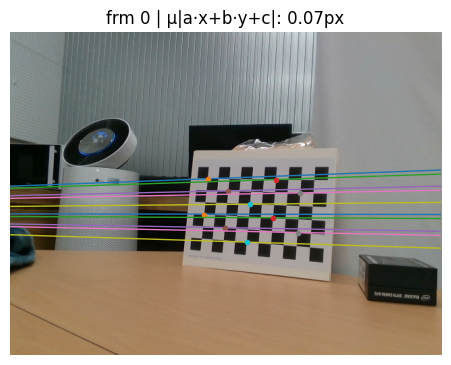

[Epipolar distance] 1->2 mean: 0.072 px, 2->1 mean: 0.075 px
[Sampson distance]  mean: 0.00380


In [276]:
metrics = verify_R_T_in_2D(
    objpoints=objpoints[:1],
    imgpoints1=imgpoints1[:1],
    imgpoints2=imgpoints2[:1],
    result=result,
    rgb_paths1=rgb_paths1[:1],
    rgb_paths2=rgb_paths2[:1],
    vis_stride=6, max_draw=12, figsize=(18,12)
)

In [297]:
import cv2
import numpy as np
import open3d as o3d
import os

# ---- 설정 ----
# 깊이 단위 스케일: PNG가 mm일 때 0.001, m면 1.0
DEPTH_SCALE = 0.001   # 예: RealSense D435 기본 16bit mm → m
MIN_DEPTH_M = 0.05    # 노이즈 제거 하한
MAX_DEPTH_M = 2.0     # 상한

def undistort_pts(pts, K, D):
    # pts: (N,1,2) → (N,2) in pixel coords (P=K 로 다시 픽셀좌표)
    return cv2.undistortPoints(pts, K, D, P=K).reshape(-1,2)

def backproject_pixels_to_3d(pix, depth_img, K):
    """ pix: (N,2) in pixels, depth_img: (H,W) in meters, K: 3x3
        반환: (N,3) in camera frame. depth==0 or 범위밖은 제외 """
    fx, fy = K[0,0], K[1,1]
    cx, cy = K[0,2], K[1,2]
    xyz = []
    for (u,v) in pix:
        u_i, v_i = int(round(u)), int(round(v))
        if v_i < 0 or v_i >= depth_img.shape[0] or u_i < 0 or u_i >= depth_img.shape[1]:
            continue
        z = float(depth_img[v_i, u_i])
        if not np.isfinite(z) or z < MIN_DEPTH_M or z > MAX_DEPTH_M:
            continue
        x = (u - cx) * z / fx
        y = (v - cy) * z / fy
        xyz.append([x,y,z])
    if len(xyz)==0:
        return np.empty((0,3), dtype=np.float32)
    return np.asarray(xyz, dtype=np.float32)

def neighborhood_samples(pix, step=2, radius=3):
    """ 각 코너 주변 (2r+1)^2 중 step 간격 샘플 좌표 생성 (옵션) """
    outs = []
    offs = np.arange(-radius, radius+1, step)
    grid = np.stack(np.meshgrid(offs, offs), axis=-1).reshape(-1,2)
    for p in pix:
        outs.append(p + grid)
    return np.vstack(outs)

def make_pcd(xyz, color):
    p = o3d.geometry.PointCloud()
    if xyz.size == 0:
        return p
    p.points = o3d.utility.Vector3dVector(xyz.astype(np.float64))
    p.colors = o3d.utility.Vector3dVector(np.tile(color, (xyz.shape[0],1)))
    return p

def visualize_3d_checkerboards_for_frame(
    frame_idx,
    imgpoints1, imgpoints2,
    depth_paths1, depth_paths2,
    K1, D1, K2, D2,
    R, T,
    dense=False
):
    # 1) 데이터 로드
    d1 = cv2.imread(depth_paths1[frame_idx], cv2.IMREAD_UNCHANGED)
    d2 = cv2.imread(depth_paths2[frame_idx], cv2.IMREAD_UNCHANGED)
    if d1 is None or d2 is None:
        raise FileNotFoundError("Depth image missing.")

    # 깊이(m)로 변환
    if d1.dtype != np.float32 and d1.dtype != np.float64:
        d1 = d1.astype(np.float32) * DEPTH_SCALE
    if d2.dtype != np.float32 and d2.dtype != np.float64:
        d2 = d2.astype(np.float32) * DEPTH_SCALE

    # 2) 코너 undistort → 픽셀좌표 유지(P=K)
    pts1 = undistort_pts(imgpoints1[frame_idx], K1, D1)  # (N,2)
    pts2 = undistort_pts(imgpoints2[frame_idx], K2, D2)

    # 3) (옵션) 코너 주변 샘플링
    if dense:
        pts1_bp = neighborhood_samples(pts1, step=2, radius=3)
        pts2_bp = neighborhood_samples(pts2, step=2, radius=3)
    else:
        pts1_bp, pts2_bp = pts1, pts2

    # 4) 역투영 → cam1, cam2 좌표계 3D
    X1 = backproject_pixels_to_3d(pts1_bp, d1, K1)  # in cam1 frame
    X2 = backproject_pixels_to_3d(pts2_bp, d2, K2)  # in cam2 frame

    # 5) cam2 → cam1 변환
    # stereoCalibrate의 정의: X2 = R * X1 + T
    # ⇒ X1 = R.T * (X2 - T)
    if X2.size > 0:
        X2_in_cam1 = (X2 - T.reshape(1,3)) @ R.T
        
    else:
        X2_in_cam1 = X2

    # 6) Open3D 시각화 객체 구성
    pcd1 = make_pcd(X1, color=np.array([0.2, 0.4, 1.0]))  # 파랑
    pcd2 = make_pcd(X2_in_cam1, color=np.array([1.0, 0.3, 0.3]))  # 빨강

    # 좌표축(단위 길이 0.05m)
    axis1 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)
    axis2 = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.05)
    # cam2 축을 cam1 좌표계로 이동
    T_cam2_in_cam1 = np.eye(4)
    T_cam2_in_cam1[:3,:3] = R
    T_cam2_in_cam1[:3, 3] = T.reshape(3)
    axis2.transform(T_cam2_in_cam1)

    print(f"[frame {frame_idx}] points cam1:{len(X1)}  cam2→cam1:{len(X2_in_cam1)}")
    o3d.visualization.draw_geometries([pcd1, pcd2, axis1, axis2])
    return [pcd1, pcd2], [axis1, axis2]

# -------- 호출 예시 --------
result = results_stereo[f"{cam1}_{cam2}"]
K1, D1 = result['cameraMatrix1'], result['distCoeffs1']
K2, D2 = result['cameraMatrix2'], result['distCoeffs2']
R, T   = result['R'], result['T']

# 특정 프레임 하나 확인 (예: 첫 공통 프레임)
frame_idx = 0
pcds, axes = visualize_3d_checkerboards_for_frame(
    frame_idx,
    imgpoints1, imgpoints2,
    depth_paths1, depth_paths2,
    K1, D1, K2, D2, R, T,
    dense=True  # 더 촘촘히 보고 싶으면 True
)


RuntimeError: Unable to cast Python instance to C++ type (compile in debug mode for details)

In [284]:
i=0
o3d.visualization.draw_geometries(pcds[i:i+1]+axes[i:i+1])


In [275]:
objpoints[0].shape


(60, 3)

In [265]:
rgb_paths1,rgb_paths2

(['./frames/0801_checkerboard/cam0\\rgb_000.jpg',
  './frames/0801_checkerboard/cam0\\rgb_001.jpg'],
 ['./frames/0801_checkerboard/cam1\\rgb_000.jpg',
  './frames/0801_checkerboard/cam1\\rgb_001.jpg'])

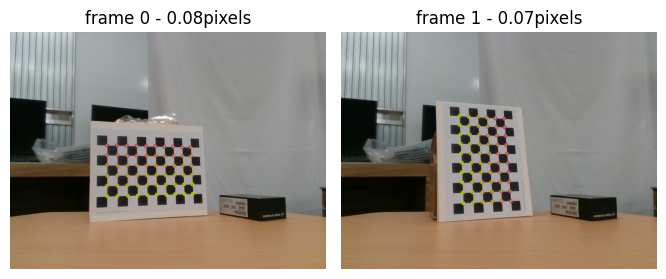

error_total: 0.0766


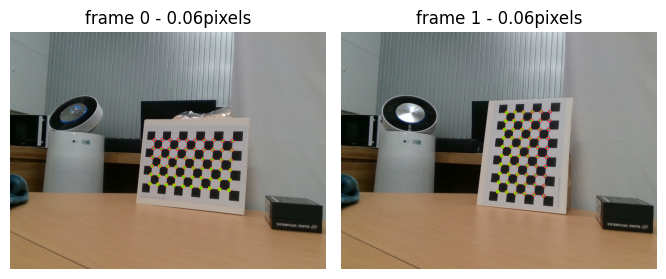

error_total: 0.0617


In [226]:
result = results_stereo[f"{cam1}_{cam2}"]
# result = filtered_result
rgb_paths1 = [os.path.join(root_folder, f"cam{cam1}", f"rgb_{str(idx).zfill(3)}.jpg") for idx in indices]
depth_paths1 = [os.path.join(root_folder, f"cam{cam1}", f"depth_{str(idx).zfill(3)}.png") for idx in indices]
rvecs1 = result["rvecs1"]
tvecs1 = result["tvecs1"]
error_total_1, pt_proj_total_1 = visualize_reprojection_errors(
    objpoints=objpoints,
    imgpoints=imgpoints1,
    K=result['cameraMatrix1'],
    dist=result['distCoeffs1'],
    rvecs=rvecs1,
    tvecs=tvecs1,
    image_paths=rgb_paths1,
    w=20, h=12
)
print(f"error_total: {np.array(error_total_1).mean():.4f}")

rgb_paths2 = [os.path.join(root_folder, f"cam{cam2}", f"rgb_{str(idx).zfill(3)}.jpg") for idx in indices]
depth_paths2 = [os.path.join(root_folder, f"cam{cam2}", f"depth_{str(idx).zfill(3)}.png") for idx in indices]
rvecs2 = result["rvecs2"]
tvecs2 = result["tvecs2"]
error_total_2, pt_proj_total_2 = visualize_reprojection_errors(
    objpoints=objpoints,
    imgpoints=imgpoints2,
    K=result['cameraMatrix2'],
    dist=result['distCoeffs2'],
    rvecs=rvecs2,
    tvecs=tvecs2,
    image_paths=rgb_paths2,
    w=20, h=12
)
print(f"error_total: {np.mean(error_total_2):.4f}")

In [219]:
pcd1 = o3d.geometry.PointCloud()
pcd1.points = o3d.utility.Vector3dVector(cam1_from_cam1)
pcd2 = o3d.geometry.PointCloud()
pcd2.points = o3d.utility.Vector3dVector(cam2_from_cam1)
o3d.visualization.draw_geometries([pcd1, pcd2])

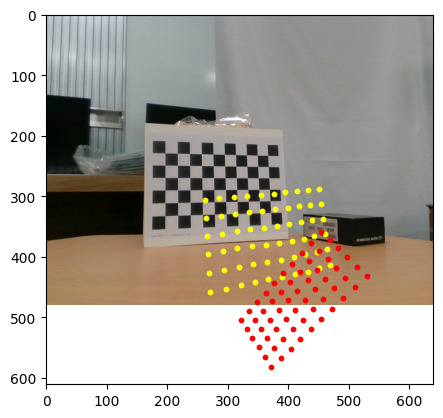

In [231]:
img_path1 = img_paths1[sel_idx]
rgb = cv2.imread(img_path1)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.scatter(img_cam1_from_cam1[:,0], img_cam1_from_cam1[:,1], color="yellow", s=10)
plt.scatter(img_cam2_from_cam1[:,0], img_cam2_from_cam1[:,1], color="red", s=10)

In [262]:
# cam1의 image coordinate에서의 체커보드 좌표. 사이즈: (60,2)
uv = pt_proj_total_1[0].squeeze()
depth_path1 = depth_paths1[sel_idx]
depth_map = cv2.imread(depth_path1, cv2.IMREAD_UNCHANGED).astype(np.float32) / 1000.0  # mm → m
depths = get_depths_from_uv(uv, depth_map)  # (60,)
uvz = np.hstack((uv, depths))
# Intrinsic. 사이즈: (3,3)
K = result["cameraMatrix1"]
K_inv = np.linalg.inv(K)

# cam1의 camera coordinate에서의 체커보드 좌표
cam1_check = (K_inv @ uvz.T).T  # scale Z 적용

# cam1의 cam to world 행렬
R1, _ = cv2.Rodrigues(result["rvecs1"][0])         # (3, 3) 회전 행렬로 변환
t1 = result["tvecs1"][0].reshape(3, 1)

# R, _ = cv2.Rodrigues(np.zeros((3, 1), dtype=np.float64))
# t = np.zeros((3, 1), dtype=np.float64)

# cam1를 cam1좌표 기준으로 보고 싶음
cam1_from_cam1 = (R1 @ (cam1_check.T) + t1.reshape(3, 1)).T

pts = cam1_from_cam1  # shape: (60, 3)
pts_proj = (result["cameraMatrix1"] @ pts.T).T  # shape: (60, 3)
pts_proj /= pts_proj[:, 2][:, np.newaxis]  # normalize

img_cam1_from_cam1 = pts_proj[:, :2]  # shape: (60, 2)
# cam2의 image coordinate에서의 체커보드 좌표. 사이즈: (60,2)
uv = pt_proj_total_2[0].squeeze()
depth_path2 = depth_paths2[sel_idx]
depth_map = cv2.imread(depth_path2, cv2.IMREAD_UNCHANGED).astype(np.float32) / 1000.0  # mm → m
depths = get_depths_from_uv(uv, depth_map)  # (60,)
uvz = np.hstack((uv, depths))
# Intrinsic. 사이즈: (3,3)
K = result["cameraMatrix2"]
K_inv = np.linalg.inv(K)

# cam2의 camera coordinate에서의 체커보드 좌표
cam2_check = (K_inv @ uvz.T).T  # scale Z 적용

# cam2의 cam to world 행렬
R2, _ = cv2.Rodrigues(result["rvecs2"][0])
t2 = result["tvecs2"][0].reshape(3, 1)

# R, _ = cv2.Rodrigues(result["R"][0])         # (3, 3) 회전 행렬로 변환
# t = result["T"].reshape(3, 1)

# cam2를 cam1좌표 기준으로
X_cam2 = cam2_check.T  # shape (3, N)

# Step 1: cam2 → world
X_world = R2 @ X_cam2 + t2  # shape (3, N)

# Step 2: world → cam1
X_cam1 = R1.T @ (X_world - t1)  # shape (3, N)

cam2_from_cam1 = X_cam1.T  # shape (N, 3)

# cam2 이미지 좌표를 cam1 이미지 좌표 기준으로 보고 싶음
# cam1 기준 3D 좌표 → image 좌표로 투영
pts = cam2_from_cam1  # shape: (60, 3)
pts_proj = (result["cameraMatrix1"] @ pts.T).T  # shape: (60, 3)
pts_proj /= pts_proj[:, 2][:, np.newaxis]  # normalize

img_cam2_from_cam1 = pts_proj[:, :2]  # shape: (60, 2)

In [263]:
cam1_check, cam2_check

(array([[-0.17584536,  0.07886171,  0.74900001],
        [-0.15373102,  0.07662329,  0.75893748],
        [-0.13051435,  0.07522644,  0.76593745],
        [-0.10791789,  0.07378857,  0.773     ],
        [-0.08457342,  0.07297075,  0.77788186],
        [-0.06189345,  0.07206226,  0.78299999],
        [-0.04201042,  0.06999885,  0.7919727 ],
        [-0.02106334,  0.06868831,  0.79832226],
        [-0.00116244,  0.06707889,  0.80562502],
        [ 0.01791432,  0.06527444,  0.81353128],
        [-0.17314276,  0.10654739,  0.74450004],
        [-0.15014404,  0.10437835,  0.75323534],
        [-0.12722084,  0.10248287,  0.76099998],
        [-0.1044345 ,  0.10079777,  0.76800001],
        [-0.08163708,  0.09937695,  0.77404881],
        [-0.06049972,  0.09738041,  0.78200001],
        [-0.03779009,  0.09640261,  0.78643948],
        [-0.01843518,  0.09399521,  0.79568756],
        [ 0.00277222,  0.09273355,  0.801     ],
        [ 0.0225443 ,  0.09098184,  0.8079375 ],
        [-0.17075425

In [ ]:
import numpy as np
from scipy.optimize import least_squares
from scipy.spatial.transform import Rotation
import cv2 as cv

def project_no_distort(X, rvec, t, K):
    R = Rotation.from_rotvec(rvec.flatten()).as_matrix()
    XT = X @ R.T + t                     # Transpose of 'X = R @ X + t'
    xT = XT @ K.T                        # Transpose of 'x = KX'
    xT = xT / xT[:,-1].reshape((-1, 1))  # Normalize
    return xT[:,0:2]

def reproject_error_pnp(unknown, X, x, K):
    rvec, tvec = unknown[:3], unknown[3:]
    xp = project_no_distort(X, rvec, tvec, K)
    err = x - xp
    return err.ravel()

def solvePnP(obj_pts, img_pts, K):
    unknown_init = np.array([0, 0, 0, 0, 0, 1.]) # Sequence: rvec(3), tvec(3)
    result = least_squares(reproject_error_pnp, unknown_init, args=(obj_pts, img_pts, K))
    return result['success'], result['x'][:3], result['x'][3:]

f, cx, cy = 1000., 320., 240.
obj_pts = np.loadtxt('../data/box.xyz')
img_pts = np.loadtxt('../data/image_formation1.xyz')[:,:2].copy()
K = np.array([[f, 0, cx], [0, f, cy], [0, 0, 1]])
dist_coeff = np.zeros(4)

# Estimate camera pose
_, rvec, tvec = solvePnP(obj_pts, img_pts, K) # Note) Ignore lens distortion
R = Rotation.from_rotvec(rvec.flatten()).as_matrix()
my_ori = Rotation.from_matrix(R.T).as_euler('xyz')
my_pos = -R.T @ tvec

# Estimate camera pose using OpenCV
_, rvec, tvec = cv.solvePnP(obj_pts, img_pts, K, dist_coeff)
R = Rotation.from_rotvec(rvec.flatten()).as_matrix()
cv_ori = Rotation.from_matrix(R.T).as_euler('xyz')
cv_pos = -R.T @ tvec.flatten()

print('\n### Ground Truth')
print('* Camera orientation: [-15, 15, 0] [deg]')
print('* Camera position   : [-2, -2, 0] [m]')
print('\n### My Camera Pose')
print(f'* Camera orientation: {np.rad2deg(my_ori)} [deg]')
print(f'* Camera position   : {my_pos} [m]')
print('\n### OpenCV Camera Pose')
print(f'* Camera orientation: {np.rad2deg(cv_ori)} [deg]')
print(f'* Camera position   : {cv_pos} [m]')

In [116]:
import numpy as np
import cv2

def get_depths_from_uv(uv, depth_map):
    """
    uv: (N, 2), float32, (u, v) 형태
    depth_map: (H, W), float32 또는 uint16 등

    returns: (N,), 각 포인트에 해당하는 depth 값
    """
    h, w = depth_map.shape
    uv = np.asarray(uv).astype(np.float32)

    # split into x and y
    u = uv[:, 0]
    v = uv[:, 1]

    # 보간된 depth 추출 (cv2.remap을 위한 형태로 reshape 필요)
    u_ = u.reshape(-1, 1)
    v_ = v.reshape(-1, 1)

    # remap은 입력 좌표가 (x, y) 즉 (u, v) 기준임
    depth_interp = cv2.remap(
        depth_map.astype(np.float32),
        u_, v_,
        interpolation=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=0
    )
    
    return depth_interp

depth_path2 = depth_paths2[sel_idx]
depth_map = cv2.imread(depth_path2, cv2.IMREAD_UNCHANGED).astype(np.float32) / 1000.0  # mm → m

uv = pt_proj_total_2[0].squeeze()   # (60, 2)
depths = get_depths_from_uv(uv, depth_map)  # (60,)

In [261]:
def draw_camera_pose(rvec, tvec, size=0.05):
    R, _ = cv2.Rodrigues(rvec)
    t = tvec.reshape(3, 1)

    T = np.eye(4)
    T[:3, :3] = R.T
    T[:3, 3] = (-R.T @ t).flatten()  # 역변환: world ← camera

    cam_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=size)
    cam_frame.transform(T)
    return cam_frame

def draw_checkerboard_points(objpoints):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(objpoints)
    return pcd

def create_colored_pointcloud_from_rgbd(rgb_image, depth_map, K, rvec, tvec, depth_min=0.0, depth_max=0.7):
    """
    rgb_image: (H, W, 3), uint8
    depth_map: (H, W), float32, 단위 meter
    K: 3x3 intrinsic matrix
    rvec, tvec: solvePnP 결과 (camera → board)
    depth_min, depth_max: 유효한 깊이 범위 (단위 meter)
    """
    assert depth_map.shape[:2] == rgb_image.shape[:2]

    height, width = depth_map.shape
    fx, fy = K[0,0], K[1,1]
    cx, cy = K[0,2], K[1,2]

    # 픽셀 좌표 그리드 생성
    u, v = np.meshgrid(np.arange(width), np.arange(height))
    Z = depth_map
    valid = (Z > depth_min) & (Z < depth_max) & np.isfinite(Z)

    # 역투영: 이미지 좌표 → 카메라 좌표계
    X = (u - cx) * Z / fx
    Y = (v - cy) * Z / fy

    x = X[valid]
    y = Y[valid]
    z = Z[valid]
    points_cam = np.stack([x, y, z], axis=1)  # (N, 3)
    colors = rgb_image[valid].astype(np.float32) / 255.0  # (N, 3)

    # 카메라 좌표계 → 월드 좌표계
    R, _ = cv2.Rodrigues(rvec)
    t = tvec.reshape(3, 1)
    points_world = (R @ (points_cam.T) + t).T  # (N, 3)
    points_world = points_world

    # Open3D 포인트 클라우드 생성
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points_world)
    pcd.colors = o3d.utility.Vector3dVector(colors)

    return pcd, colors

sel_idx = 0
rgb_path1 = rgb_paths1[sel_idx]
depth_path1 = depth_paths1[sel_idx]
rvec1 = np.zeros((3, 1), dtype=np.float64)
tvec1 = np.zeros((3, 1), dtype=np.float64)
# rvec1 = result["rvecs1"][0]
# tvec1 = result["tvecs1"][0]
rgb = cv2.imread(rgb_path1)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
depth = cv2.imread(depth_path1, cv2.IMREAD_UNCHANGED).astype(np.float32) / 1000.0  # mm → m
pcd1, color1 = create_colored_pointcloud_from_rgbd(rgb, depth, result["cameraMatrix1"], rvec1, tvec1, \
                                           depth_min=0.3, depth_max=1.1)

rgb_path2 = rgb_paths2[sel_idx]
depth_path2 = depth_paths2[sel_idx]
R = result["R"]
T = result["T"]
rvec2, _ = cv2.Rodrigues(R)
tvec2 = T
# rvec2 = result["rvecs2"][0]
# tvec2 = result["tvecs2"][0]
# rvec2, _ = cv2.Rodrigues(R_rel)
# tvec2 = t_rel.reshape(3, 1)
# rvec2 = np.zeros((3, 1), dtype=np.float64)
# tvec2 = np.zeros((3, 1), dtype=np.float64)
rgb = cv2.imread(rgb_path2)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
depth = cv2.imread(depth_path2, cv2.IMREAD_UNCHANGED).astype(np.float32) / 1000.0  # mm → m
pcd2, color2 = create_colored_pointcloud_from_rgbd(rgb, depth, result["cameraMatrix2"], rvec2, tvec2, \
                                          depth_min=0.3, depth_max=1.1)

# 시각화
o3d.visualization.draw_geometries([pcd1, draw_camera_pose(rvec1, tvec1), pcd2, draw_camera_pose(rvec2, tvec2)])

In [253]:
# ======= ICP 정합 수행 ========
# pcd1: 기준 (fixed), pcd2: 움직일 대상 (source)

threshold = 0.1  # 최대 대응 거리 (단위: m)
trans_init = np.eye(4)  # 초기 정렬 행렬 (identity)

reg_p2p = o3d.pipelines.registration.registration_icp(
    source=pcd2,
    target=pcd1,
    max_correspondence_distance=threshold,
    init=trans_init,
    estimation_method=o3d.pipelines.registration.TransformationEstimationPointToPoint()
)

print("ICP Transformation Matrix:")
print(reg_p2p.transformation)

# ======= 정합된 결과 시각화 ========
pcd2_icp = pcd2.transform(reg_p2p.transformation)
pcd2_icp.colors = o3d.utility.Vector3dVector(color2)
o3d.visualization.draw_geometries([
    pcd1.paint_uniform_color([1, 0.706, 0]),  # 노랑
    pcd2_icp.paint_uniform_color([0, 0.651, 0.929]),  # 파랑
])


ICP Transformation Matrix:
[[ 0.9958437   0.08254787  0.03848602 -0.09757473]
 [-0.08046405  0.99535434 -0.0528703   0.00657933]
 [-0.04267156  0.04955382  0.99785949 -0.00636475]
 [ 0.          0.          0.          1.        ]]


In [255]:
pcd2_icp.colors = o3d.utility.Vector3dVector(color2)
o3d.visualization.draw_geometries([pcd1, draw_camera_pose(rvec1, tvec1), pcd2_icp, draw_camera_pose(rvec2, tvec2)])

In [ ]:
{
	"class_name" : "ViewTrajectory",
	"interval" : 29,
	"is_loop" : false,
	"trajectory" : 
	[
		{
			"boundingbox_max" : [ 0.55291044368893738, 0.28211440168462582, 0.094690535740043727 ],
			"boundingbox_min" : [ -0.11807922968762201, -0.34595162215736208, -0.96205037862751686 ],
			"field_of_view" : 60.0,
			"front" : [ -0.10619980802431159, -0.032583929252544587, -0.99381079101107805 ],
			"lookat" : [ 0.18636984724091252, 0.20069545978340672, -0.61432920892711229 ],
			"up" : [ -0.058330262103500022, -0.99753762166015325, 0.038939361776253976 ],
			"zoom" : 0.34000000000000002
		}
	],
	"version_major" : 1,
	"version_minor" : 0
}

In [51]:
t_rel, result["T"]

(array([-0.01352826, -0.00430156, -0.01792815]),
 array([[-0.44156598],
        [ 0.00819364],
        [ 0.24626713]]))

In [49]:
rvec2, _ = cv2.Rodrigues(result["R"])
rvec2

array([[0.05222264],
       [0.92036126],
       [0.0015331 ]])

In [43]:
import numpy as np
import cv2
from scipy.optimize import least_squares
from scipy.sparse import lil_matrix
from scipy.spatial.transform import Rotation as R

# Step 1: Flatten observations and build index arrays
def build_ba_inputs(objpoints, imgpoints1, imgpoints2, rvecs1, tvecs1, rvecs2, tvecs2):
    n_frames = len(objpoints)
    n_points = objpoints[0].shape[0]

    # Observations
    points_2d = []
    camera_indices = []
    point_indices = []

    for i in range(n_frames):
        for j in range(n_points):
            # Left camera observation
            points_2d.append(imgpoints1[i][j, 0])
            camera_indices.append(2 * i)
            point_indices.append(i * n_points + j)

            # Right camera observation
            points_2d.append(imgpoints2[i][j, 0])
            camera_indices.append(2 * i + 1)
            point_indices.append(i * n_points + j)

    points_2d = np.array(points_2d)
    camera_indices = np.array(camera_indices)
    point_indices = np.array(point_indices)

    # Step 2: Build initial camera parameters
    cameras = []
    for i in range(n_frames):
        for rvec, tvec in [(rvecs1[i], tvecs1[i]), (rvecs2[i], tvecs2[i])]:
            rot = R.from_rotvec(rvec.flatten())
            rotvec = rot.as_rotvec()
            trans = tvec.flatten()
            cameras.append(np.hstack([rotvec, trans]))
    cameras = np.array(cameras)

    # Step 3: Triangulate initial 3D points
    P3Ds = []
    for i in range(n_frames):
        P1 = cv2.Rodrigues(rvecs1[i])[0]
        P1 = np.hstack((P1, tvecs1[i]))
        P2 = cv2.Rodrigues(rvecs2[i])[0]
        P2 = np.hstack((P2, tvecs2[i]))

        K_dummy = np.eye(3)
        P1 = K_dummy @ P1
        P2 = K_dummy @ P2

        points4D = cv2.triangulatePoints(P1, P2, imgpoints1[i].squeeze().T, imgpoints2[i].squeeze().T)
        points3D = (points4D[:3] / points4D[3]).T
        P3Ds.append(points3D)
    P3Ds = np.vstack(P3Ds)

    return cameras, P3Ds, points_2d, camera_indices, point_indices

# Step 4: Define projection model
def project(points, cam_params, K):
    rot_vecs = cam_params[:, :3]
    t_vecs = cam_params[:, 3:6]
    proj_points = []

    for rot_vec, t_vec, pt in zip(rot_vecs, t_vecs, points):
        R_mat = R.from_rotvec(rot_vec).as_matrix()
        pt_cam = R_mat @ pt + t_vec
        pt_proj = K @ pt_cam
        pt_proj /= pt_proj[2]
        proj_points.append(pt_proj[:2])
    return np.array(proj_points)

# Step 5: Reprojection error function
def reprojection_error(params, n_cameras, n_points, camera_indices, point_indices, points_2d, K):
    cam_params = params[:n_cameras * 6].reshape((n_cameras, 6))
    pts_3d = params[n_cameras * 6:].reshape((n_points, 3))
    pts_proj = project(pts_3d[point_indices], cam_params[camera_indices], K)
    return (pts_proj - points_2d).ravel()

# Step 6: Jacobian sparsity
def bundle_adjustment_sparsity(n_cameras, n_points, camera_indices, point_indices):
    m = camera_indices.size * 2
    n = n_cameras * 6 + n_points * 3
    A = lil_matrix((m, n), dtype=int)

    i = np.arange(camera_indices.size)
    for s in range(6):
        A[2 * i, camera_indices * 6 + s] = 1
        A[2 * i + 1, camera_indices * 6 + s] = 1

    for s in range(3):
        A[2 * i, n_cameras * 6 + point_indices * 3 + s] = 1
        A[2 * i + 1, n_cameras * 6 + point_indices * 3 + s] = 1

    return A


In [61]:
from scipy.optimize import least_squares

# 예시: bundle adjustment 수행
K1 = result["cameraMatrix1"]
cameras, points_3d, points_2d, cam_idx, pt_idx = build_ba_inputs(
    objpoints, imgpoints1, imgpoints2,
    result["rvecs1"],
    result["tvecs1"],
    result["rvecs2"],
    result["tvecs2"]
)

n_cams = cameras.shape[0]
n_pts = points_3d.shape[0]
x0 = np.hstack((cameras.ravel(), points_3d.ravel()))

J = bundle_adjustment_sparsity(n_cams, n_pts, cam_idx, pt_idx)

res = least_squares(
    reprojection_error, x0, jac_sparsity=J, verbose=2,
    x_scale='jac', ftol=1e-4, method='trf',
    args=(n_cams, n_pts, cam_idx, pt_idx, points_2d, K1)
)

# 결과 추출
opt_cams = res.x[:n_cams * 6].reshape((n_cams, 6))
opt_points = res.x[n_cams * 6:].reshape((n_pts, 3))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.1881e+13                                    3.36e+16    
       1              2         5.0819e+12      1.68e+13       4.27e-02       4.18e+15    
       2              3         9.7400e+11      4.11e+12       1.23e-01       5.11e+14    
       3              4         1.2800e+11      8.46e+11       1.98e-01       5.82e+13    
       4              5         1.2997e+10      1.15e+11       1.70e-01       4.51e+12    
       5              6         4.3202e+09      8.68e+09       1.51e-01       2.43e+13    
       6              7         3.2370e+09      1.08e+09       2.83e-02       1.48e+14    
       7              8         9.4185e+08      2.30e+09       1.36e-02       1.96e+13    
       8              9         2.5426e+08      6.88e+08       2.38e-02       2.49e+12    
       9             10         6.0918e+07      1.93e+08       5.67e-02       2.94e+11    

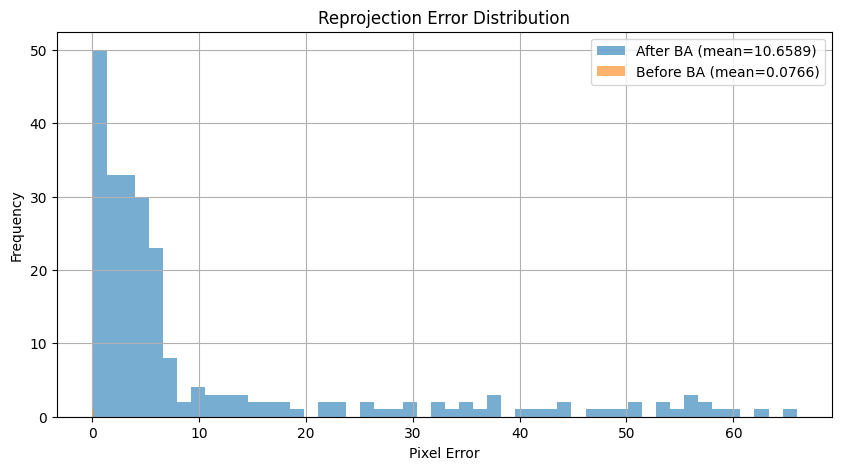

In [60]:
import matplotlib.pyplot as plt

# === reprojection error before BA ===
def compute_reprojection_error_before(objpoints, imgpoints, rvecs, tvecs, K, dist):
    total_error = 0
    total_points = 0
    all_errors = []

    for i in range(len(objpoints)):
        projected, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist)
        error = np.linalg.norm(imgpoints[i].squeeze() - projected.squeeze(), axis=1)
        all_errors.extend(error)
        total_error += error.sum()
        total_points += len(error)

    mean_error = total_error / total_points
    return mean_error, np.array(all_errors)


# === reprojection error after BA ===
def compute_reprojection_error_after(opt_cams, opt_points, points_2d, cam_idx, pt_idx, K):
    n_obs = len(points_2d)
    projected_pts = project(opt_points[pt_idx], opt_cams[cam_idx], K)
    error = np.linalg.norm(points_2d - projected_pts, axis=1)
    mean_error = np.mean(error)
    return mean_error, error


# 예시 변수 연결 (K, rvecs1, tvecs1 등은 사용자 데이터 기준)
K = results_stereo["0_1"]["cameraMatrix1"]
dist = results_stereo["0_1"]["distCoeffs1"]
rvecs1 = results_stereo["0_1"]["rvecs1"]
tvecs1 = results_stereo["0_1"]["tvecs1"]
imgpoints1 = results_corner["0_1"][1]
objpoints = results_corner["0_1"][0]

# 1. Before BA
mean_before, errors_before = compute_reprojection_error_before(objpoints, imgpoints1, rvecs1, tvecs1, K, dist)

# 2. After BA
mean_after, errors_after = compute_reprojection_error_after(opt_cams, opt_points, points_2d, cam_idx, pt_idx, K)

# 3. 시각화
plt.figure(figsize=(10, 5))
plt.hist(errors_after, bins=50, alpha=0.6, label=f"After BA (mean={mean_after:.4f})")
plt.hist(errors_before, bins=50, alpha=0.6, label=f"Before BA (mean={mean_before:.4f})")
plt.title("Reprojection Error Distribution")
plt.xlabel("Pixel Error")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
opt_points.shape


(120, 3)

In [45]:
# cam0 (왼쪽 카메라), cam1 (오른쪽 카메라) 기준
rvec0 = opt_cams[0, :3]
tvec0 = opt_cams[0, 3:]
rvec1 = opt_cams[1, :3]
tvec1 = opt_cams[1, 3:]

# 회전 행렬
R0 = R.from_rotvec(rvec0).as_matrix()
R1 = R.from_rotvec(rvec1).as_matrix()

# 두 카메라 간 상대 회전 및 이동
R_rel = R1 @ R0.T
t_rel = tvec1 - R_rel @ tvec0
